<center> МИНИСТЕРСТВО НАУКИ И ВЫСШЕГО ОБРАЗОВАНИЯ</center>
<center>РОССИЙСКОЙ ФЕДЕРАЦИИ</center>
<center>Федеральное государственное бюджетное образовательное учреждение</center>
<center>высшего образования</center>
<center>«Московский государственный технический университет имени Н.Э.</center>
<center>Баумана</center>
<center>(национальный исследовательский университет)»</center>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<center>ВЫПУСКНАЯ КВАЛИФИКАЦИОННАЯ РАБОТА</center>
<center> по курсу </center>
<center> «Data Science»</center>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<center>  Cлушатель                              Большаков Андрей Александрович</center>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

**<center> Москва, 2022**

# 1. Открытие файла и получение общей информации

## 1.1 Импорт библиотек

In [1]:
# вызов библиотеки pandas
import pandas as pd
# импорт библиотеки numpy
import numpy as np
# импорт библиотеки seaborn
import seaborn as sns
# импорт библиотеки scipy
from scipy import stats as st
import scipy
# импорт библиотеки warnings
import warnings
warnings.filterwarnings("default", category=FutureWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

#sklearn
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor

#statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#глубокое обучение
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from keras import models
import tensorflow as tf

# импорт библиотеки matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

## 1.2 Чтение данных и сохранение в переменные

In [2]:
# чтение файла
bp=pd.read_excel('X_bp.xlsx')
nup=pd.read_excel('X_nup.xlsx')
# просмотр общей информации о датасете
bp.info()
# вывод на экран датасета
display(bp)
# просмотр общей информации о датасете
nup.info()
# вывод на экран датасета
display(nup)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023 entries, 0 to 1022
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            1023 non-null   int64  
 1   Соотношение матрица-наполнитель       1023 non-null   float64
 2   Плотность, кг/м3                      1023 non-null   float64
 3   модуль упругости, ГПа                 1023 non-null   float64
 4   Количество отвердителя, м.%           1023 non-null   float64
 5   Содержание эпоксидных групп,%_2       1023 non-null   float64
 6   Температура вспышки, С_2              1023 non-null   float64
 7   Поверхностная плотность, г/м2         1023 non-null   float64
 8   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 9   Прочность при растяжении, МПа         1023 non-null   float64
 10  Потребление смолы, г/м2               1023 non-null   float64
dtypes: float64(10), i

Unnamed: 0  Соотношение матрица-наполнитель  Плотность, кг/м3  \
0              0                         1.857143       2030.000000   
1              1                         1.857143       2030.000000   
2              2                         1.857143       2030.000000   
3              3                         1.857143       2030.000000   
4              4                         2.771331       2030.000000   
...          ...                              ...               ...   
1018        1018                         2.271346       1952.087902   
1019        1019                         3.444022       2050.089171   
1020        1020                         3.280604       1972.372865   
1021        1021                         3.705351       2066.799773   
1022        1022                         3.808020       1890.413468   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
0                738.736842                    30.000000   
1                738.736842                    50.000000   
2                738.736842                    49.900000   
3                738.736842                   129.000000   
4                753.000000                   111.860000   
...                     ...                          ...   
1018             912.855545                    86.992183   
1019             444.732634                   145.981978   
1020             416.836524                   110.533477   
1021             741.475517                   141.397963   
1022             417.316232                   129.183416   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0                           22.267857                100.000000   
1                           23.750000                284.615385   
2                           33.000000                284.615385   
3                           21.250000                300.000000   
4                           22.267857                284.615385   
...                               ...                       ...   
1018                        20.123249                324.774576   
1019                        19.599769                254.215401   
1020                        23.957502                248.423047   
1021                        19.246945                275.779840   
1022                        27.474763                300.952708   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0                        210.000000                             70.000000   
1                        210.000000                             70.000000   
2                        210.000000                             70.000000   
3                        210.000000                             70.000000   
4                        210.000000                             70.000000   
...                             ...                                   ...   
1018                     209.198700                             73.090961   
1019                     350.660830                             72.920827   
1020                     740.142791                             74.734344   
1021                     641.468152                             74.042708   
1022                     758.747882                             74.309704   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  
0                       3000.000000               220.000000  
1                       3000.000000               220.000000  
2                       3000.000000               220.000000  
3                       3000.000000               220.000000  
4                       3000.000000               220.000000  
...                             ...                      ...  
1018                    2387.292495               125.007669  
1019                    2360.392784               117.730099  
1020                    2662.906040               236.606764  
1021                    2071.715856               197.126067  
1022     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1040 non-null   int64  
 1   Угол нашивки, град  1040 non-null   int64  
 2   Шаг нашивки         1040 non-null   float64
 3   Плотность нашивки   1040 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 32.6 KB


Unnamed: 0  Угол нашивки, град  Шаг нашивки  Плотность нашивки
0              0                   0     4.000000          57.000000
1              1                   0     4.000000          60.000000
2              2                   0     4.000000          70.000000
3              3                   0     5.000000          47.000000
4              4                   0     5.000000          57.000000
...          ...                 ...          ...                ...
1035        1035                  90     8.088111          47.759177
1036        1036                  90     7.619138          66.931932
1037        1037                  90     9.800926          72.858286
1038        1038                  90    10.079859          65.519479
1039        1039                  90     9.021043          66.920143

[1040 rows x 4 columns]

## 1.3 Объединяем датасеты по индексу, тип объединения INNER

In [3]:
df = pd.merge(bp, nup, on=["Unnamed: 0"], how='inner')

In [4]:
# просмотр общей информации о датасете
df.info()
# вывод на экран датасета
df.T

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            1023 non-null   int64  
 1   Соотношение матрица-наполнитель       1023 non-null   float64
 2   Плотность, кг/м3                      1023 non-null   float64
 3   модуль упругости, ГПа                 1023 non-null   float64
 4   Количество отвердителя, м.%           1023 non-null   float64
 5   Содержание эпоксидных групп,%_2       1023 non-null   float64
 6   Температура вспышки, С_2              1023 non-null   float64
 7   Поверхностная плотность, г/м2         1023 non-null   float64
 8   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 9   Прочность при растяжении, МПа         1023 non-null   float64
 10  Потребление смолы, г/м2               1023 non-null   float64
 11  Угол нашивки, гра

0            1            2     \
Unnamed: 0                               0.000000     1.000000     2.000000   
Соотношение матрица-наполнитель          1.857143     1.857143     1.857143   
Плотность, кг/м3                      2030.000000  2030.000000  2030.000000   
модуль упругости, ГПа                  738.736842   738.736842   738.736842   
Количество отвердителя, м.%             30.000000    50.000000    49.900000   
Содержание эпоксидных групп,%_2         22.267857    23.750000    33.000000   
Температура вспышки, С_2               100.000000   284.615385   284.615385   
Поверхностная плотность, г/м2          210.000000   210.000000   210.000000   
Модуль упругости при растяжении, ГПа    70.000000    70.000000    70.000000   
Прочность при растяжении, МПа         3000.000000  3000.000000  3000.000000   
Потребление смолы, г/м2                220.000000   220.000000   220.000000   
Угол нашивки, град                       0.000000     0.000000     0.000000   
Шаг нашивки                              4.000000     4.000000     4.000000   
Плотность нашивки                       57.000000    60.000000    70.000000   

                                             3            4            5     \
Unnamed: 0                               3.000000     4.000000     5.000000   
Соотношение матрица-наполнитель          1.857143     2.771331     2.767918   
Плотность, кг/м3                      2030.000000  2030.000000  2000.000000   
модуль упругости, ГПа                  738.736842   753.000000   748.000000   
Количество отвердителя, м.%            129.000000   111.860000   111.860000   
Содержание эпоксидных групп,%_2         21.250000    22.267857    22.267857   
Температура вспышки, С_2               300.000000   284.615385   284.615385   
Поверхностная плотность, г/м2          210.000000   210.000000   210.000000   
Модуль упругости при растяжении, ГПа    70.000000    70.000000    70.000000   
Прочность при растяжении, МПа         3000.000000  3000.000000  3000.000000   
Потребление смолы, г/м2                220.000000   220.000000   220.000000   
Угол нашивки, град                       0.000000     0.000000     0.000000   
Шаг нашивки                              5.000000     5.000000     5.000000   
Плотность нашивки                       47.000000    57.000000    60.000000   

                                             6            7            8     \
Unnamed: 0                               6.000000     7.000000     8.000000   
Соотношение матрица-наполнитель          2.569620     2.561475     3.557018   
Плотность, кг/м3                      1910.000000  1900.000000  1930.000000   
модуль упругости, ГПа                  807.000000   535.000000   889.000000   
Количество отвердителя, м.%            111.860000   111.860000   129.000000   
Содержание эпоксидных групп,%_2         22.267857    22.267857    21.250000   
Температура вспышки, С_2               284.615385   284.615385   300.000000   
Поверхностная плотность, г/м2          210.000000   380.000000   380.000000   
Модуль упругости при растяжении, ГПа    70.000000    75.000000    75.000000   
Прочность при растяжении, МПа         3000.000000  1800.000000  1800.000000   
Потребление смолы, г/м2                220.000000   120.000000   120.000000   
Угол нашивки, град                       0.000000     0.000000     0.000000   
Шаг нашивки                              5.000000     7.000000     7.000000   
Плотность нашивки                       70.000000    47.000000    57.000000   

                                             9     ...         1013  \
Unnamed: 0                               9.000000  ...  1013.000000   
Соотношение матрица-наполнитель          3.532338  ...     2.310394   
Плотность, кг/м3                      2100.000000  ...  1931.146887   
модуль упругости, ГПа                 1421.000000  ...   554.010341   
Количество отвердителя, м.%            129.000000  ...    96.749782   
Содержание эпоксидных групп,%_2         21.250000  ...    22.

#### удалим столбец с названием в "Unnamed: 0"

In [5]:
df.drop('Unnamed: 0', inplace=True, axis=1)

In [6]:
df.head(1)

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         1.857143            2030.0             738.736842   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                         30.0                        22.267857   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                     100.0                          210.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                  70.0                         3000.0   

   Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                    220.0                   0          4.0               57.0

# 2. Подготовка данных

Заменим названия столбцов, а именно приведем заголовки к нижнему регистру.

In [7]:
df.columns = df.columns.str.lower()
df.head(1)

соотношение матрица-наполнитель  плотность, кг/м3  модуль упругости, гпа  \
0                         1.857143            2030.0             738.736842   

   количество отвердителя, м.%  содержание эпоксидных групп,%_2  \
0                         30.0                        22.267857   

   температура вспышки, с_2  поверхностная плотность, г/м2  \
0                     100.0                          210.0   

   модуль упругости при растяжении, гпа  прочность при растяжении, мпа  \
0                                  70.0                         3000.0   

   потребление смолы, г/м2  угол нашивки, град  шаг нашивки  плотность нашивки  
0                    220.0                   0          4.0               57.0

Проверим, есть ли пропущенные значения в каждой переменной.

In [8]:
display(df.isnull().sum())

соотношение матрица-наполнитель         0
плотность, кг/м3                        0
модуль упругости, гпа                   0
количество отвердителя, м.%             0
содержание эпоксидных групп,%_2         0
температура вспышки, с_2                0
поверхностная плотность, г/м2           0
модуль упругости при растяжении, гпа    0
прочность при растяжении, мпа           0
потребление смолы, г/м2                 0
угол нашивки, град                      0
шаг нашивки                             0
плотность нашивки                       0
dtype: int64

Пропуски отсутствуют.

Проверим количество уникальных значений

In [9]:
df.nunique()

соотношение матрица-наполнитель         1014
плотность, кг/м3                        1013
модуль упругости, гпа                   1020
количество отвердителя, м.%             1005
содержание эпоксидных групп,%_2         1004
температура вспышки, с_2                1003
поверхностная плотность, г/м2           1004
модуль упругости при растяжении, гпа    1004
прочность при растяжении, мпа           1004
потребление смолы, г/м2                 1003
угол нашивки, град                         2
шаг нашивки                              989
плотность нашивки                        988
dtype: int64

In [10]:
df['угол нашивки, град'].unique()

array([ 0, 90], dtype=int64)

Параметр "Угол нашивки, град" имеет всего 2 значения: 0 и 90.

Угол нашивки закодируем LabelEncoder в 0 и 1.

In [11]:
le_angle = LabelEncoder()
le_angle.fit(df['угол нашивки, град'])
df['угол нашивки, град'] = le_angle.transform(df['угол нашивки, град'])

Посмотрим распределение целевых параметров, построив гисторграммы.

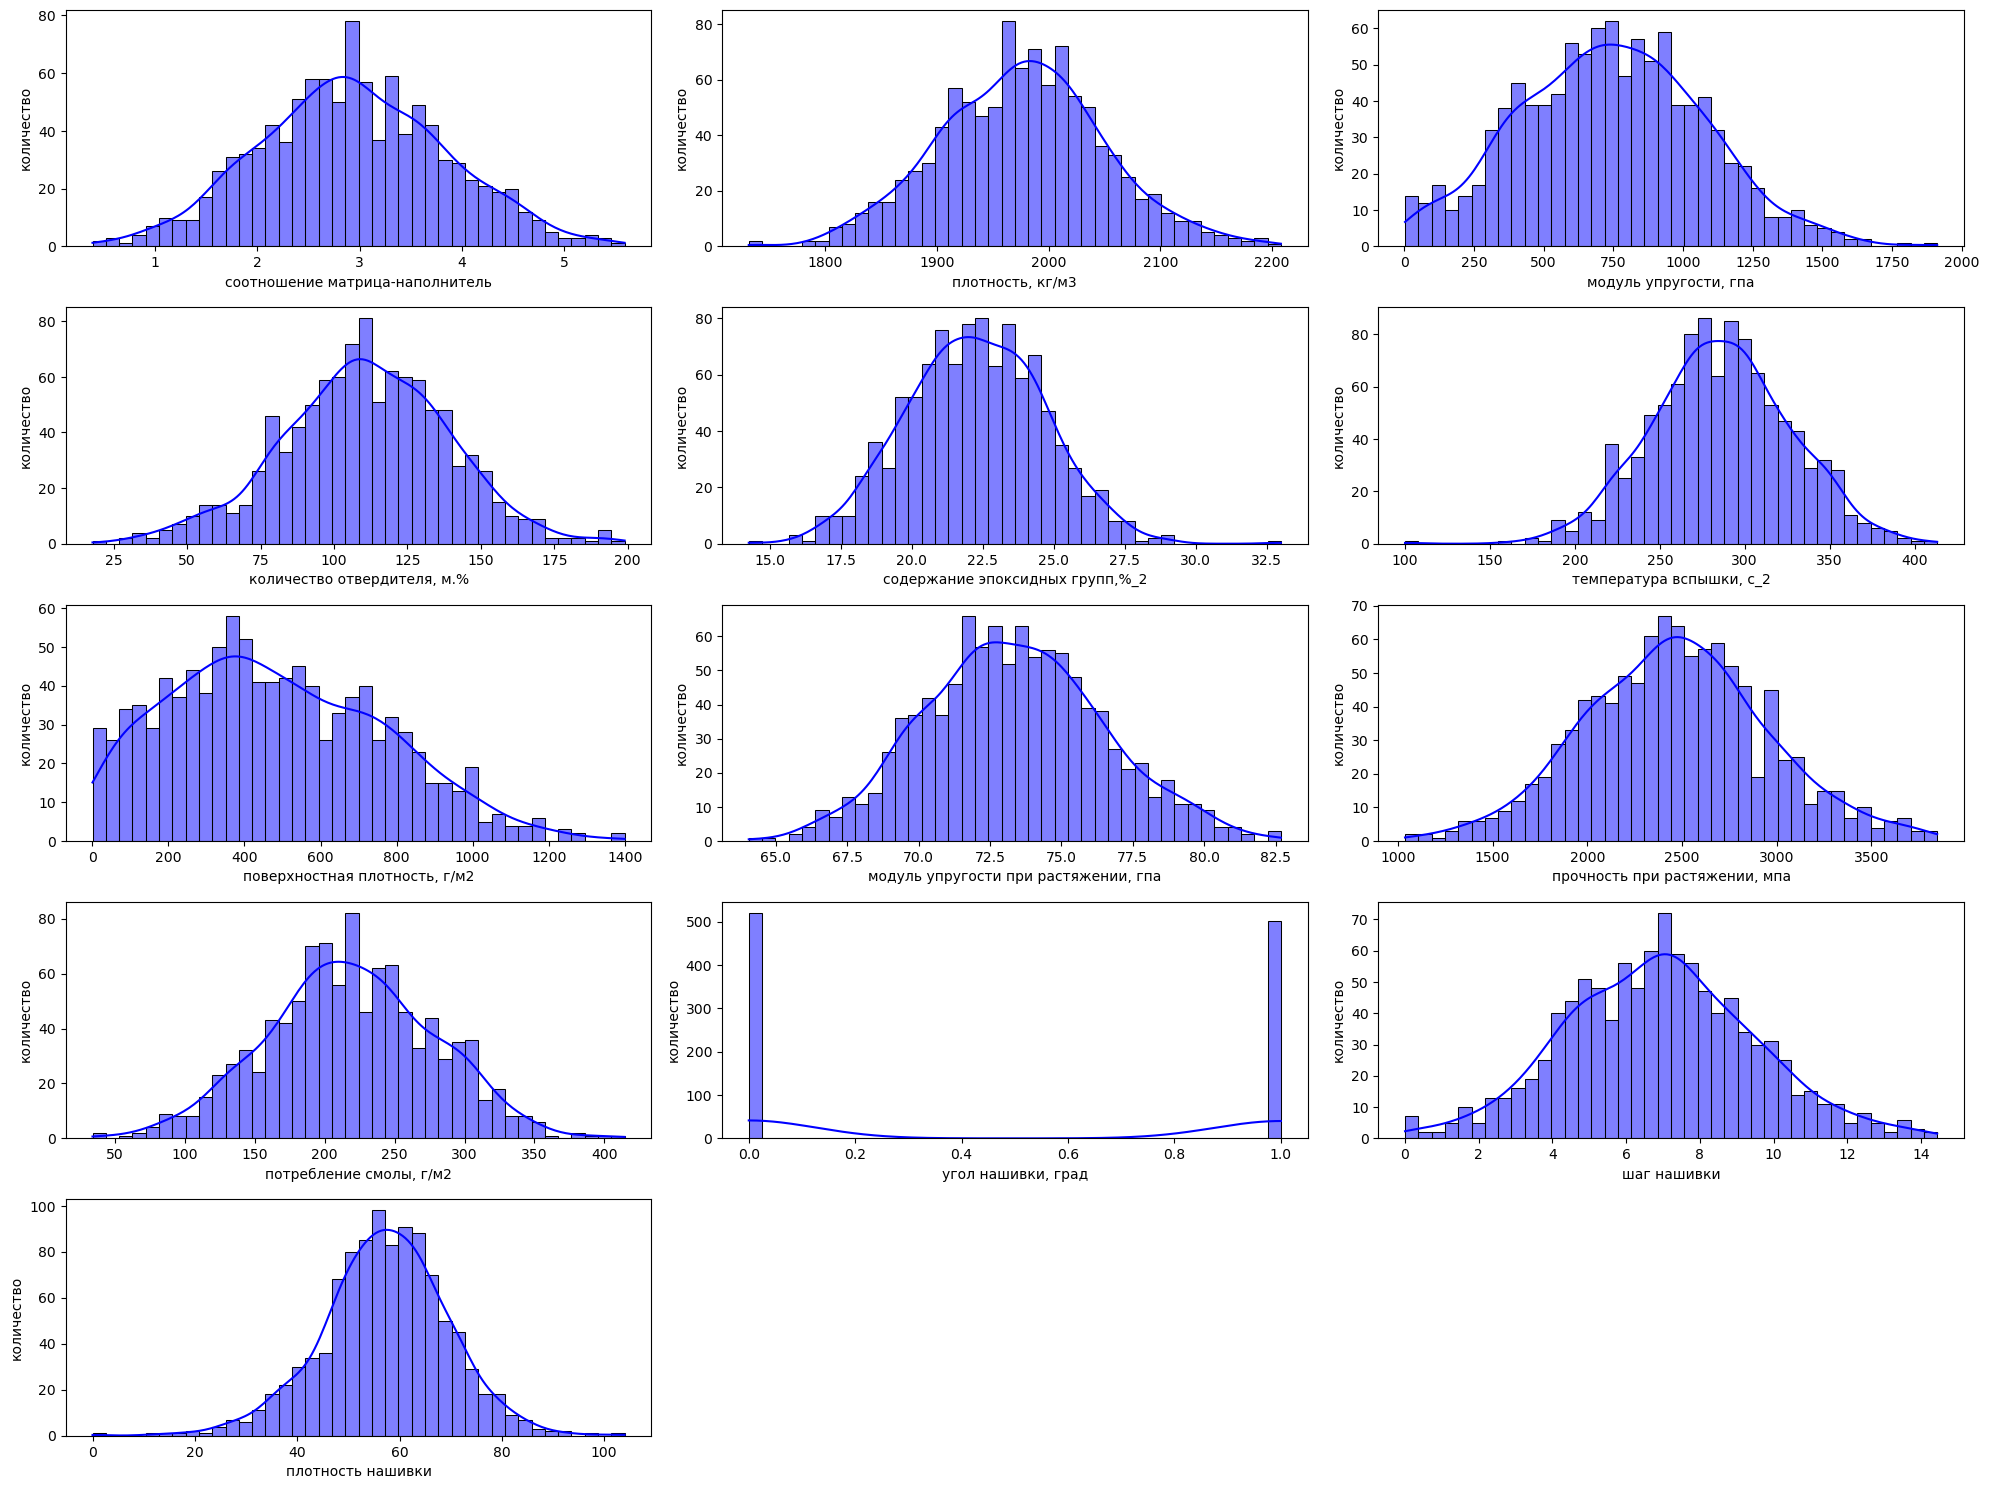

In [12]:
from matplotlib.colorbar import colorbar_factory
def histogram (df, n_rows, n_cols):
    fig=plt.figure(figsize=(20, 15))
    for i, column in enumerate(df.columns):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        sns.histplot(data=df, x=column, kde=True, bins=40, color = 'blue')
        plt.ylabel('количество')
    fig.tight_layout()
    plt.show()

histogram(df, 5, 3)

Все исследуемые  показатели имеют распределение близкое к нормальному согласно куполообразной форме графика. При этом параметр "Поверхностная плотность, г/м2" имеет правосторонний "хвост". У показателя "Угол нашвки, град" 2 вершины.

Проверим параметры на выбросы, построив диаграммы "ящик с усами":

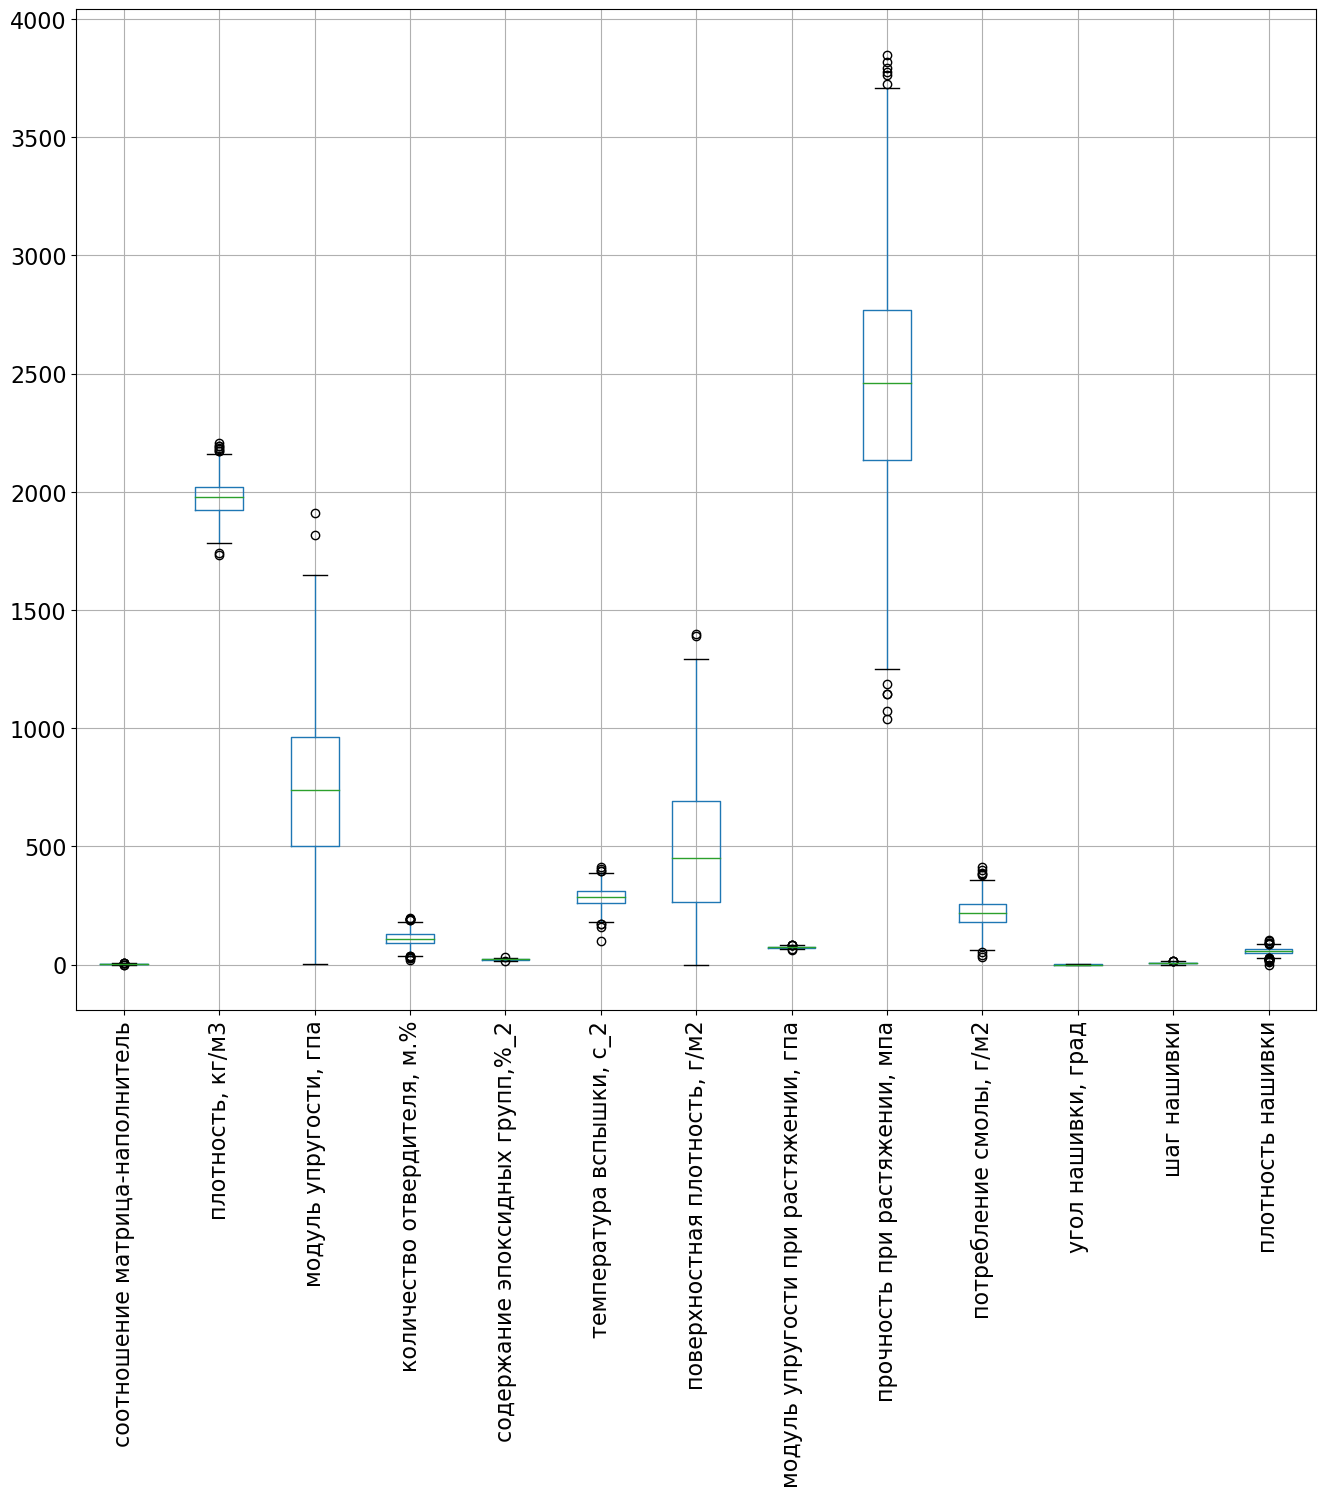

In [13]:
df.boxplot(rot=90, figsize=(16,13))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

Согласно графику "ящик с усами" в распределении всех показателей, за иключением "Угол нашивки" есть выбросы.

Избавимся от шумов согласно правилу  1,5-кратного межквартилього диапазона (1,5 IQR).

In [14]:
for i in df.columns:
    q75, q25 = np.percentile(df.loc[:,i], [75,25])
    intr_qr = q75 - q25
    max = q75 + (1.5 * intr_qr)
    min = q25 - (1.5 * intr_qr)
    df.loc[df[i] < min, i] = np.nan
    df.loc[df[i] > max, i] = np.nan
df.dropna(inplace = True)

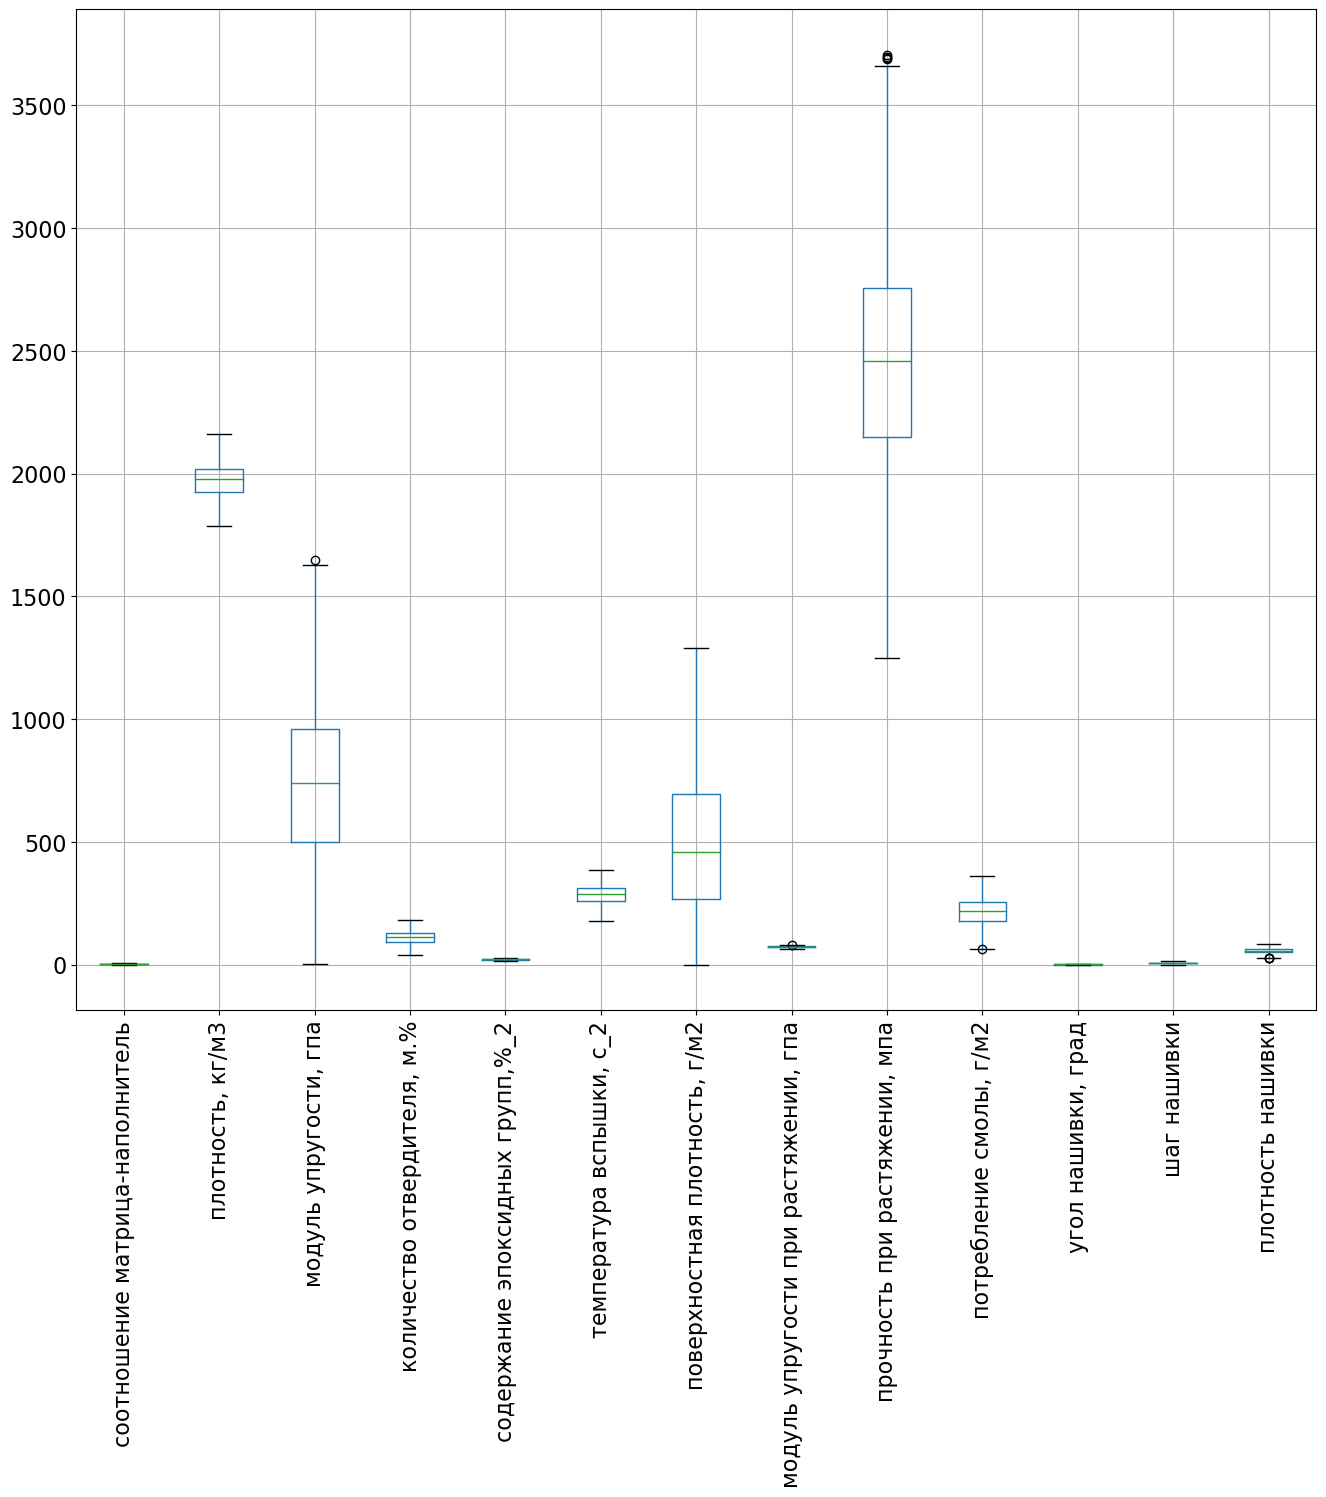

In [15]:
df.boxplot(rot=90, figsize=(16,13))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

После первого цикла избавления от выбросов, аномальные значения в параметрах сохранились. Повторим процедуру избаления от шумов еще раз.

In [16]:
for i in df.columns:
    q75, q25 = np.percentile(df.loc[:,i], [75,25])
    intr_qr = q75 - q25
    max = q75 + (1.5 * intr_qr)
    min = q25 - (1.5 * intr_qr)
    df.loc[df[i] < min, i] = np.nan
    df.loc[df[i] > max, i] = np.nan
df.dropna(inplace = True)

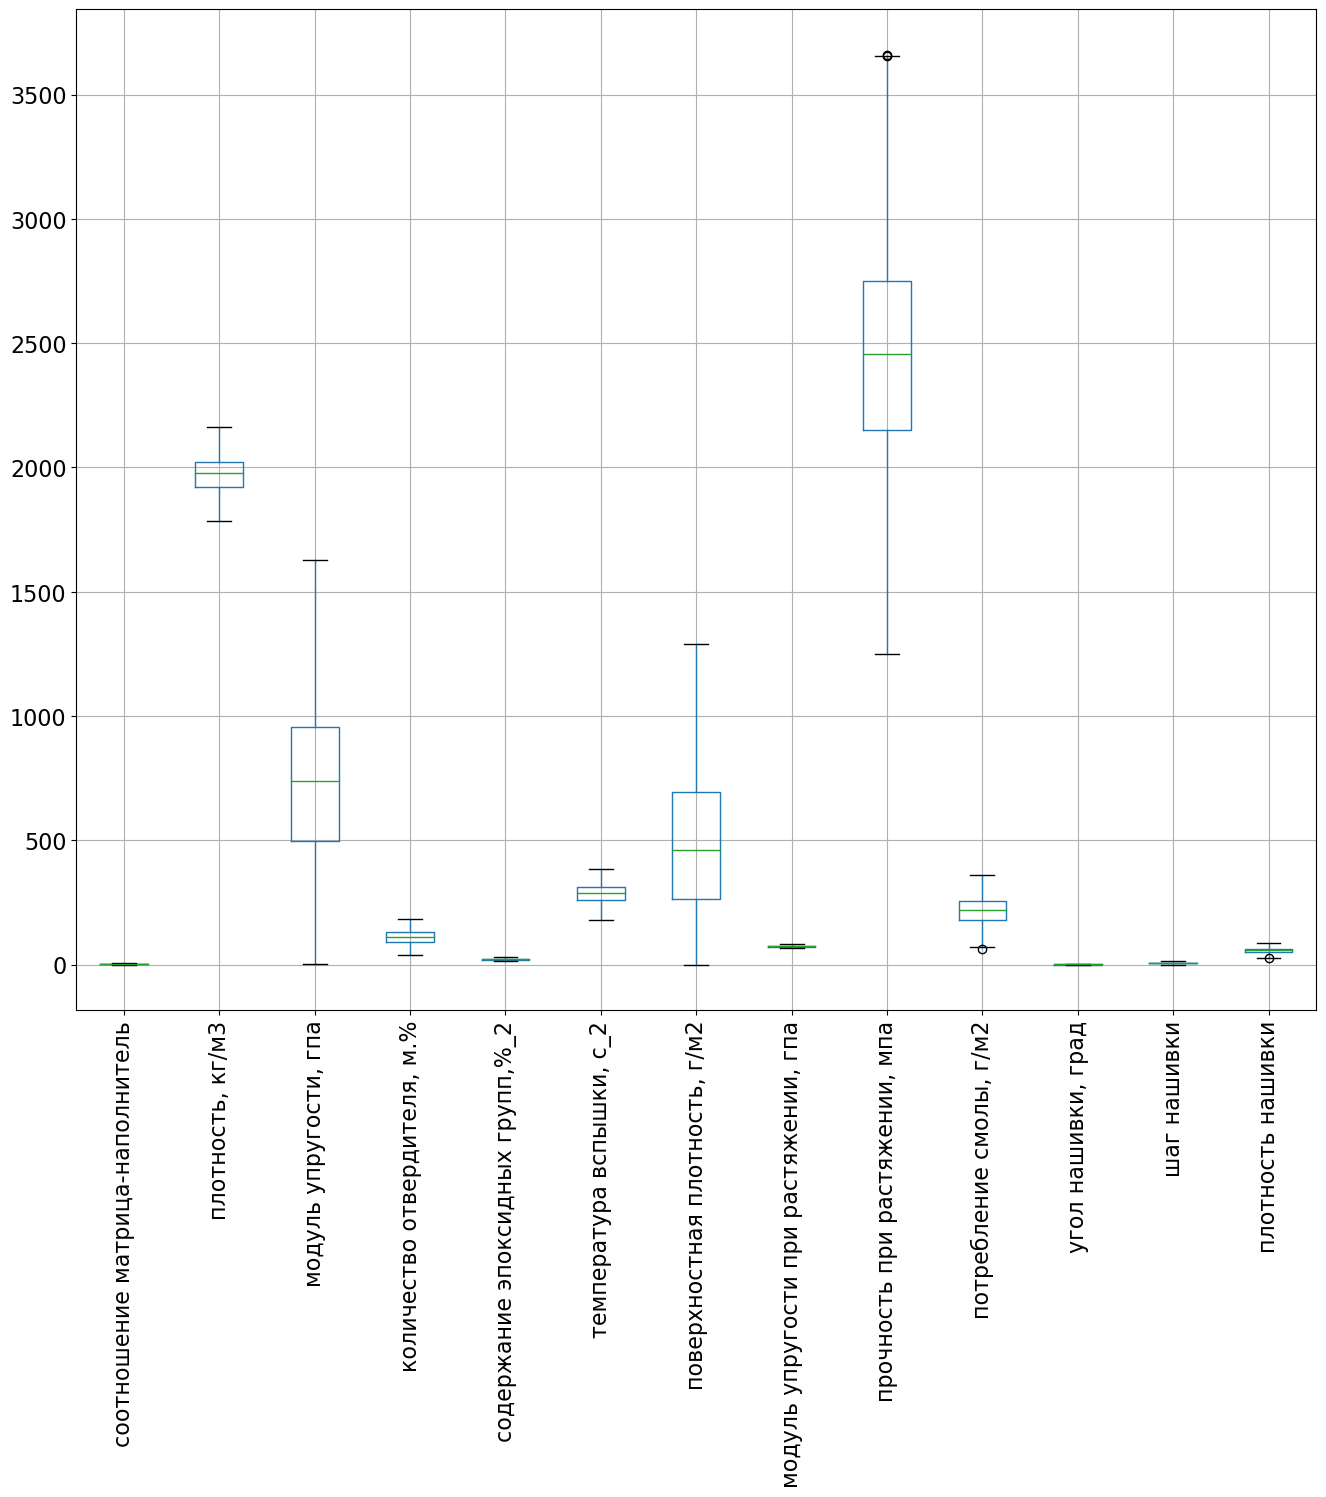

In [17]:
df.boxplot(rot=90, figsize=(16,13))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

Повторим процедуру избавления от выбросов.

In [18]:
for i in df.columns:
    q75, q25 = np.percentile(df.loc[:,i], [75,25])
    intr_qr = q75 - q25
    max = q75 + (1.5 * intr_qr)
    min = q25 - (1.5 * intr_qr)
    df.loc[df[i] < min, i] = np.nan
    df.loc[df[i] > max, i] = np.nan
df.dropna(inplace = True)

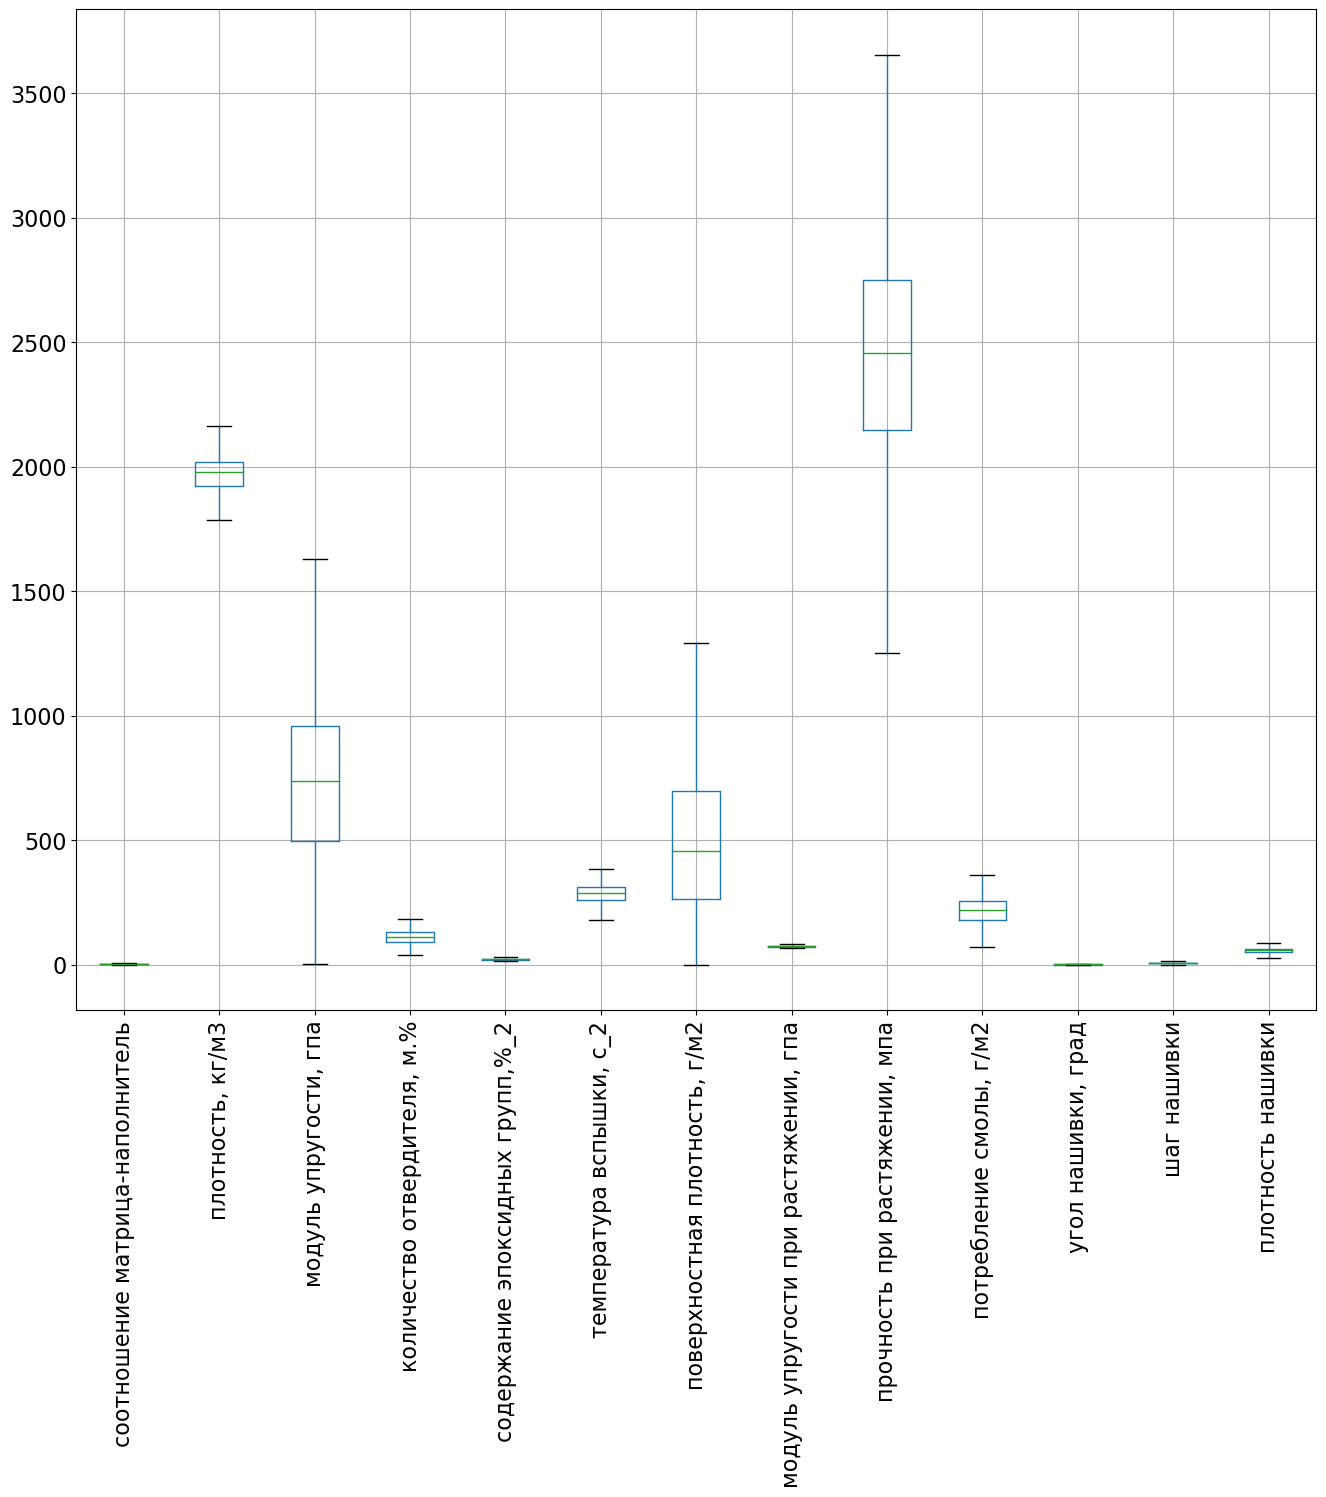

In [19]:
df.boxplot(rot=90, figsize=(16,13))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [20]:
df.shape

(922, 13)

В результате избавления от выбросов за 3 итерации удалено 101 измерение, что составляет менее 10% от первоначального количества измерений.

Проведем оценку плотности ядра.

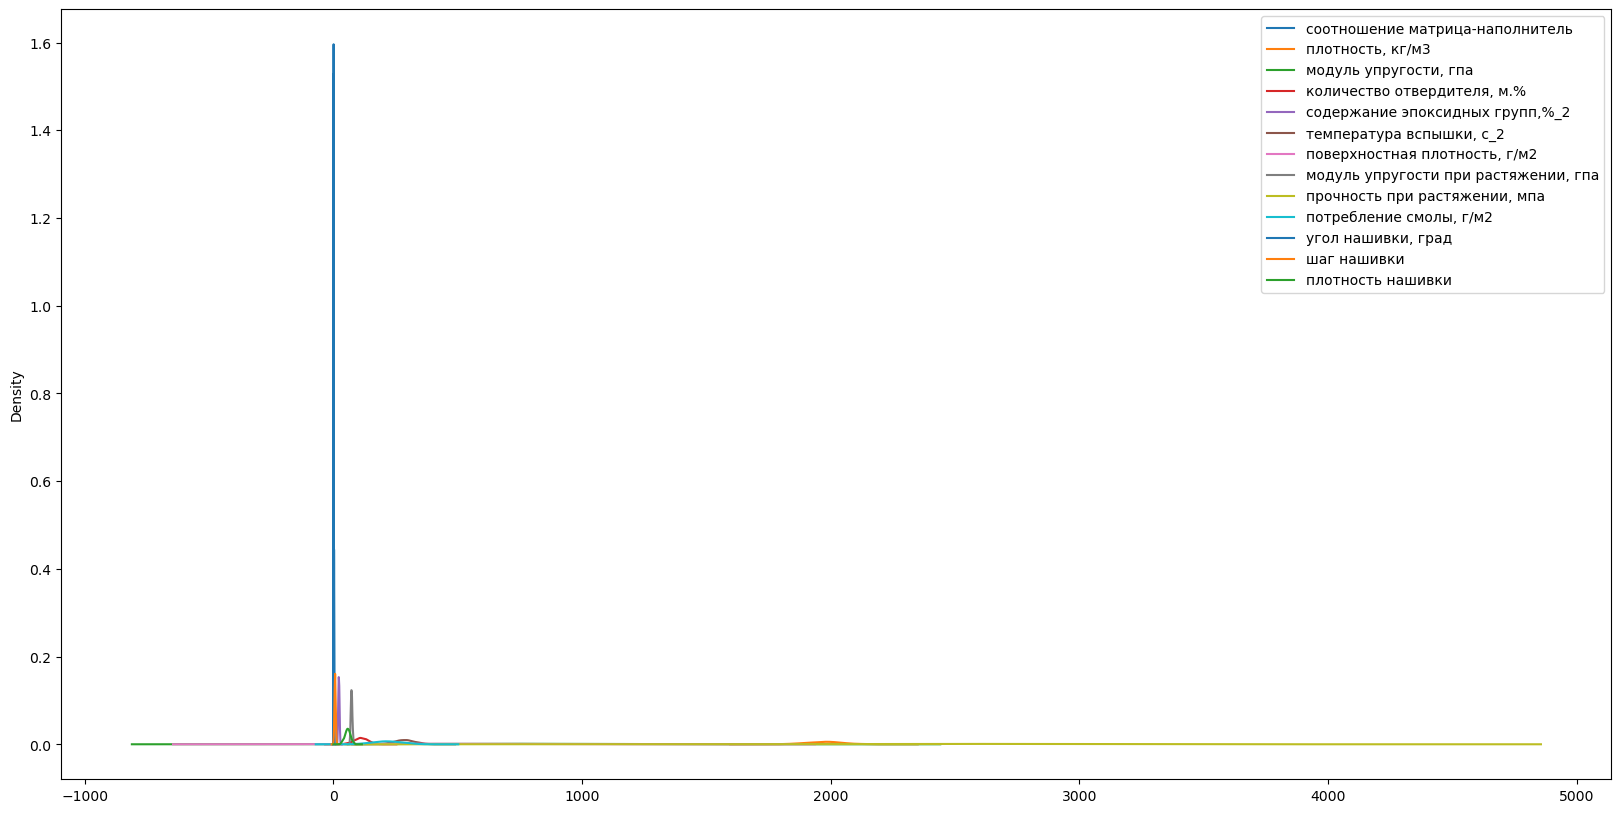

In [21]:
def plt_kde(df):
    fig, ax = plt.subplots(figsize=(20, 10))
    df.plot(kind='kde', ax=ax)
plt_kde(df)

Сохраним датасет в новую переменную и пронормализируем значения методом MinMaxScaler.

In [22]:
df_norm = df.copy(deep=True)
mmscaler = MinMaxScaler()
columns = df.columns

df_norm[columns] = mmscaler.fit_transform(df_norm[columns])

Посмотрим описание датасета после предобработки и нормализации.

In [23]:
df_norm.describe().T.round(3)

count   mean    std  min    25%    50%  \
соотношение матрица-наполнитель       922.0  0.499  0.188  0.0  0.372  0.495   
плотность, кг/м3                      922.0  0.503  0.188  0.0  0.368  0.511   
модуль упругости, гпа                 922.0  0.451  0.202  0.0  0.305  0.451   
количество отвердителя, м.%           922.0  0.506  0.187  0.0  0.379  0.506   
содержание эпоксидных групп,%_2       922.0  0.491  0.181  0.0  0.367  0.489   
температура вспышки, с_2              922.0  0.517  0.191  0.0  0.386  0.517   
поверхностная плотность, г/м2         922.0  0.373  0.217  0.0  0.204  0.354   
модуль упругости при растяжении, гпа  922.0  0.487  0.196  0.0  0.354  0.484   
прочность при растяжении, мпа         922.0  0.504  0.189  0.0  0.373  0.501   
потребление смолы, г/м2               922.0  0.508  0.199  0.0  0.375  0.510   
угол нашивки, град                    922.0  0.511  0.500  0.0  0.000  1.000   
шаг нашивки                           922.0  0.503  0.184  0.0  0.373  0.506   
плотность нашивки                     922.0  0.504  0.194  0.0  0.377  0.504   

                                        75%  max  
соотношение матрица-наполнитель       0.630  1.0  
плотность, кг/м3                      0.625  1.0  
модуль упругости, гпа                 0.587  1.0  
количество отвердителя, м.%           0.639  1.0  
содержание эпоксидных групп,%_2       0.623  1.0  
температура вспышки, с_2              0.647  1.0  
поверхностная плотность, г/м2         0.538  1.0  
модуль упругости при растяжении, гпа  0.618  1.0  
прочность при растяжении, мпа         0.624  1.0  
потребление смолы, г/м2               0.643  1.0  
угол нашивки, град                    1.000  1.0  
шаг нашивки                           0.626  1.0  
плотность нашивки                     0.631  1.0

In [24]:
df_norm.T.round(3)

1      3      4      5      6     \
соотношение матрица-наполнитель       0.275  0.275  0.467  0.466  0.424   
плотность, кг/м3                      0.651  0.651  0.651  0.572  0.333   
модуль упругости, гпа                 0.453  0.453  0.462  0.459  0.495   
количество отвердителя, м.%           0.079  0.631  0.511  0.511  0.511   
содержание эпоксидных групп,%_2       0.607  0.419  0.496  0.496  0.496   
температура вспышки, с_2              0.509  0.584  0.509  0.509  0.509   
поверхностная плотность, г/м2         0.162  0.162  0.162  0.162  0.162   
модуль упругости при растяжении, гпа  0.273  0.273  0.273  0.273  0.273   
прочность при растяжении, мпа         0.728  0.728  0.728  0.728  0.728   
потребление смолы, г/м2               0.515  0.515  0.515  0.515  0.515   
угол нашивки, град                    0.000  0.000  0.000  0.000  0.000   
шаг нашивки                           0.289  0.362  0.362  0.362  0.362   
плотность нашивки                     0.546  0.320  0.494  0.546  0.721   

                                       7      8      9      10     11    ...  \
соотношение матрица-наполнитель       0.423  0.631  0.626  0.498  0.489  ...   
плотность, кг/м3                      0.306  0.386  0.837  0.996  0.545  ...   
модуль упругости, гпа                 0.328  0.545  0.873  0.572  1.000  ...   
количество отвердителя, м.%           0.511  0.631  0.631  0.631  0.631  ...   
содержание эпоксидных групп,%_2       0.496  0.419  0.419  0.419  0.419  ...   
температура вспышки, с_2              0.509  0.584  0.584  0.584  0.584  ...   
поверхностная плотность, г/м2         0.294  0.294  0.782  0.782  0.782  ...   
модуль упругости при растяжении, гпа  0.597  0.597  0.792  0.792  0.792  ...   
прочность при растяжении, мпа         0.229  0.229  0.312  0.312  0.312  ...   
потребление смолы, г/м2               0.166  0.166  0.794  0.794  0.794  ...   
угол нашивки, град                    0.000  0.000  0.000  0.000  0.000  ...   
шаг нашивки                           0.508  0.508  0.508  0.508  0.654  ...   
плотность нашивки                     0.320  0.494  0.546  0.721  0.320  ...   

                                       1013   1014   1015   1016   1017  \
соотношение матрица-наполнитель       0.370  0.231  0.474  0.671  0.464   
плотность, кг/м3                      0.389  0.611  0.234  0.345  0.573   
модуль упругости, гпа                 0.339  0.516  0.611  0.417  0.573   
количество отвердителя, м.%           0.406  0.449  0.751  0.505  0.729   
содержание эпоксидных групп,%_2       0.486  0.406  0.442  0.771  0.429   
температура вспышки, с_2              0.172  0.446  0.651  0.631  0.457   
поверхностная плотность, г/м2         0.043  0.476  0.619  0.486  0.050   
модуль упругости при растяжении, гпа  0.801  0.867  0.456  0.664  0.119   
прочность при растяжении, мпа         0.287  0.527  0.496  0.506  0.770   
потребление смолы, г/м2               0.051  0.558  0.819  0.278  0.549   
угол нашивки, град                    1.000  1.000  1.000  1.000  1.000   
шаг нашивки                           0.558  0.366  0.380  0.586  0.635   
плотность нашивки                     0.595  0.544  0.408  0.321  0.551   

                                       1018   1019   1020   1021   1022  
соотношение матрица-наполнитель       0.362  0.608  0.573  0.662  0.684  
плотность, кг/м3                      0.444  0.704  0.498  0.749  0.281  
модуль упругости, гпа                 0.560  0.272  0.255  0.455  0.255  
количество отвердителя, м.%           0.338  0.750  0.502  0.718  0.632  
содержание эпоксидных групп,%_2       0.334  0.294  0.623  0.268  0.888  
температура вспышки, с_2              0.703  0.362  0.334  0.466  0.588  
поверхностная плотность, г/м2         0.162  0.271  0.573  0.497  0.587  
модуль упругости при растяжении, гпа  0.474  0.463  0.580  0.535  0.553  
прочность при растяжении, мпа         0.473  0.462  0.588  0.342  0.668  
потребление смолы, г/м2               0.183  0.158  0.573  0.435  0.427  
уг

Построим график "ящик с усами" после нормализации.

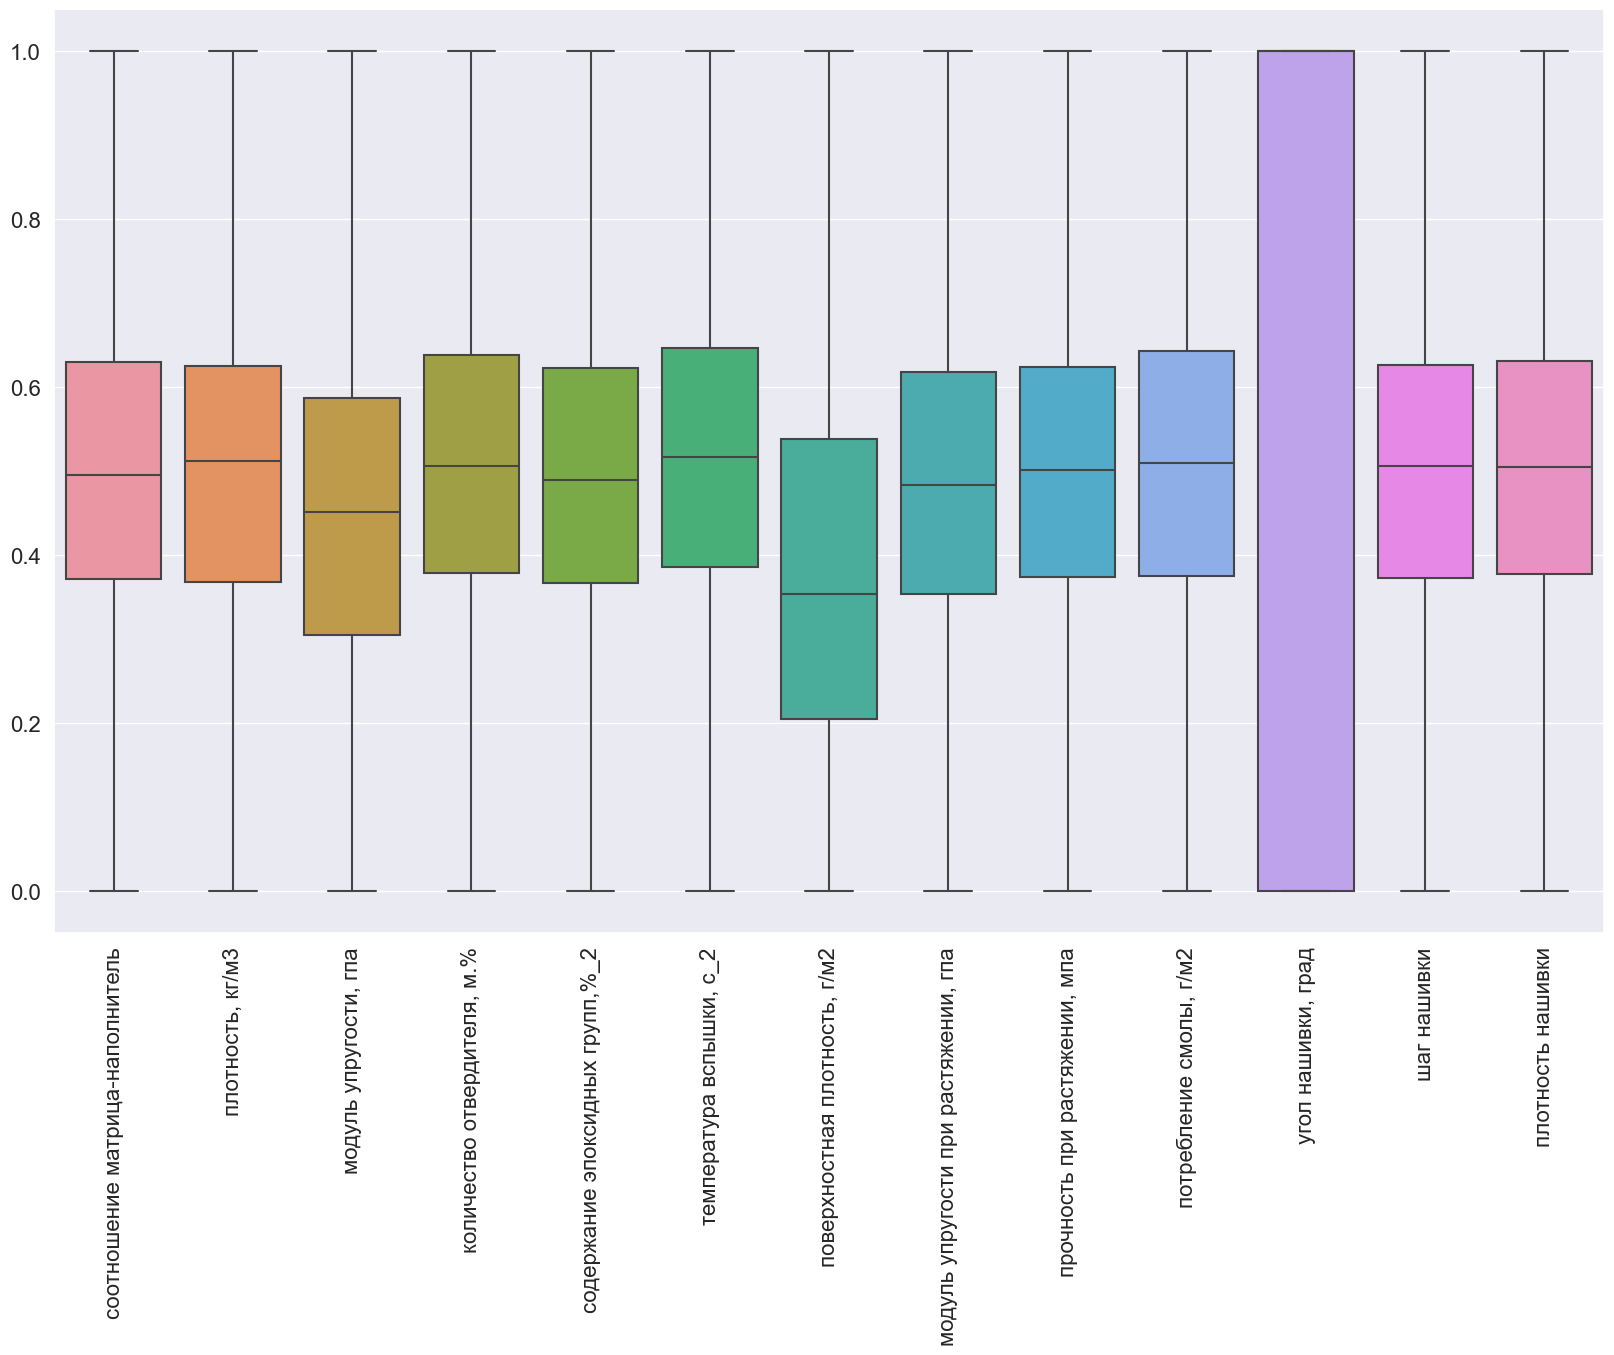

In [25]:
sns.set(rc={'figure.figsize':(20,12)})
ax = sns.boxplot(data=df_norm)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

Посмотрим оценку плотности ядра после нормализации.

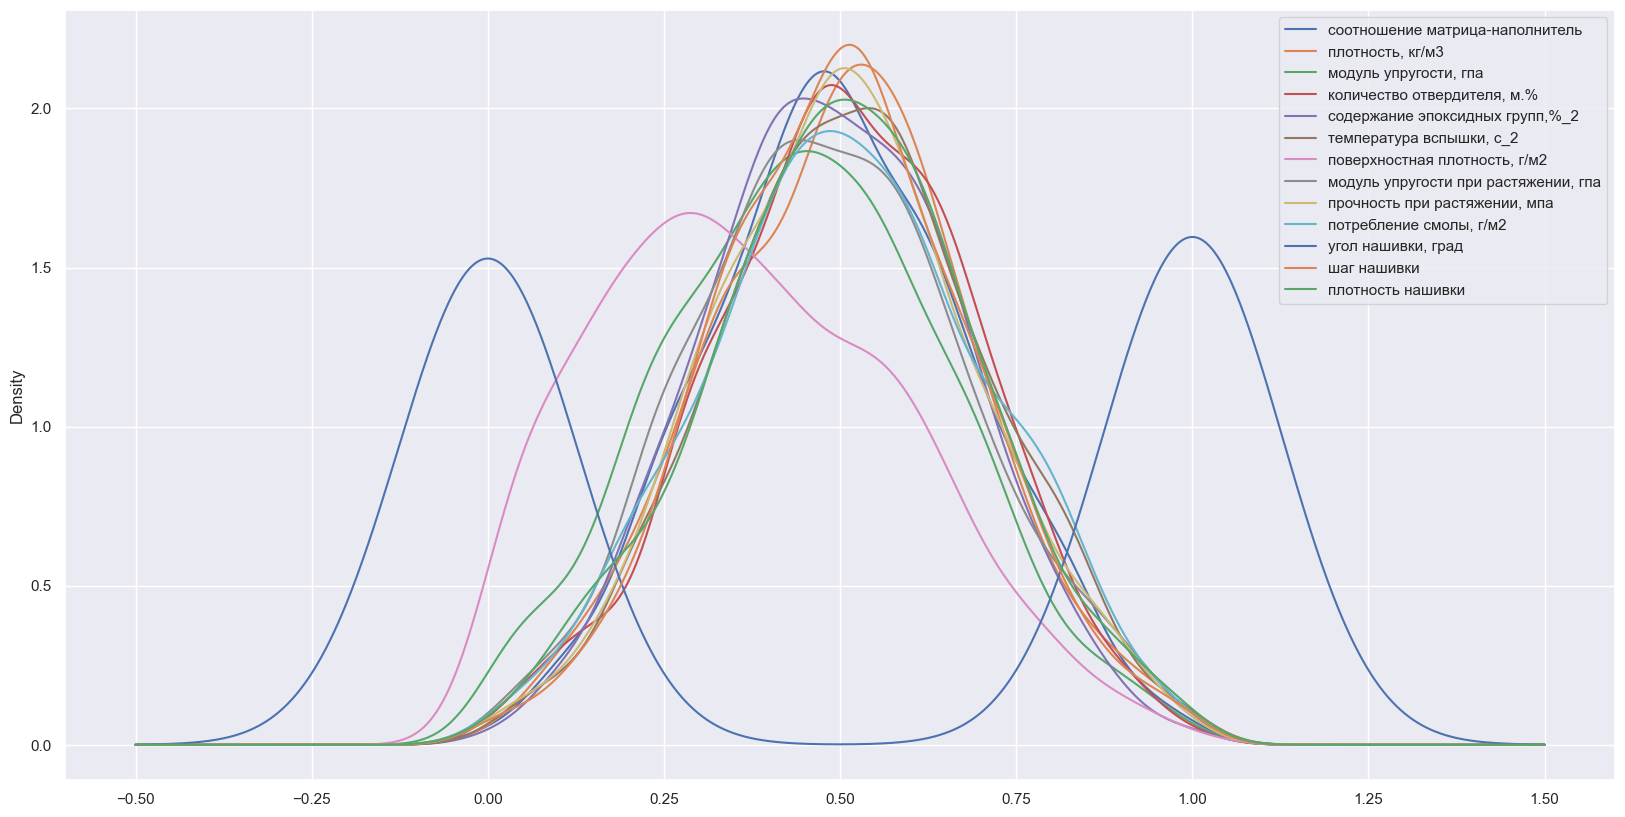

In [26]:
plt_kde(df_norm)

Большинство параметров нормально распределены, за исключением показателей "Поверхностная плотность, г/м2", который имеет левостороннее смещение и "Угол нашивки", по сути категориальный показатель, который имеет 2 уникальных значения. "Угол нашивки" закодирован значениями 0 и 1.

### Для определения наличия взаимосвязи между показателями построим графики рассеяния и опеределим корреляцию показателей с помощью тепловой карты корреляционной матрицы.

Графики рассеяния.

Графики рассеяния полезны для отображения многомерных данных. С их помощью можно определить потенциальные взаимосвязи между количественными переменными. В простой диаграмме рассеяния используется плоская система координат для просмотра значений двух переменных.


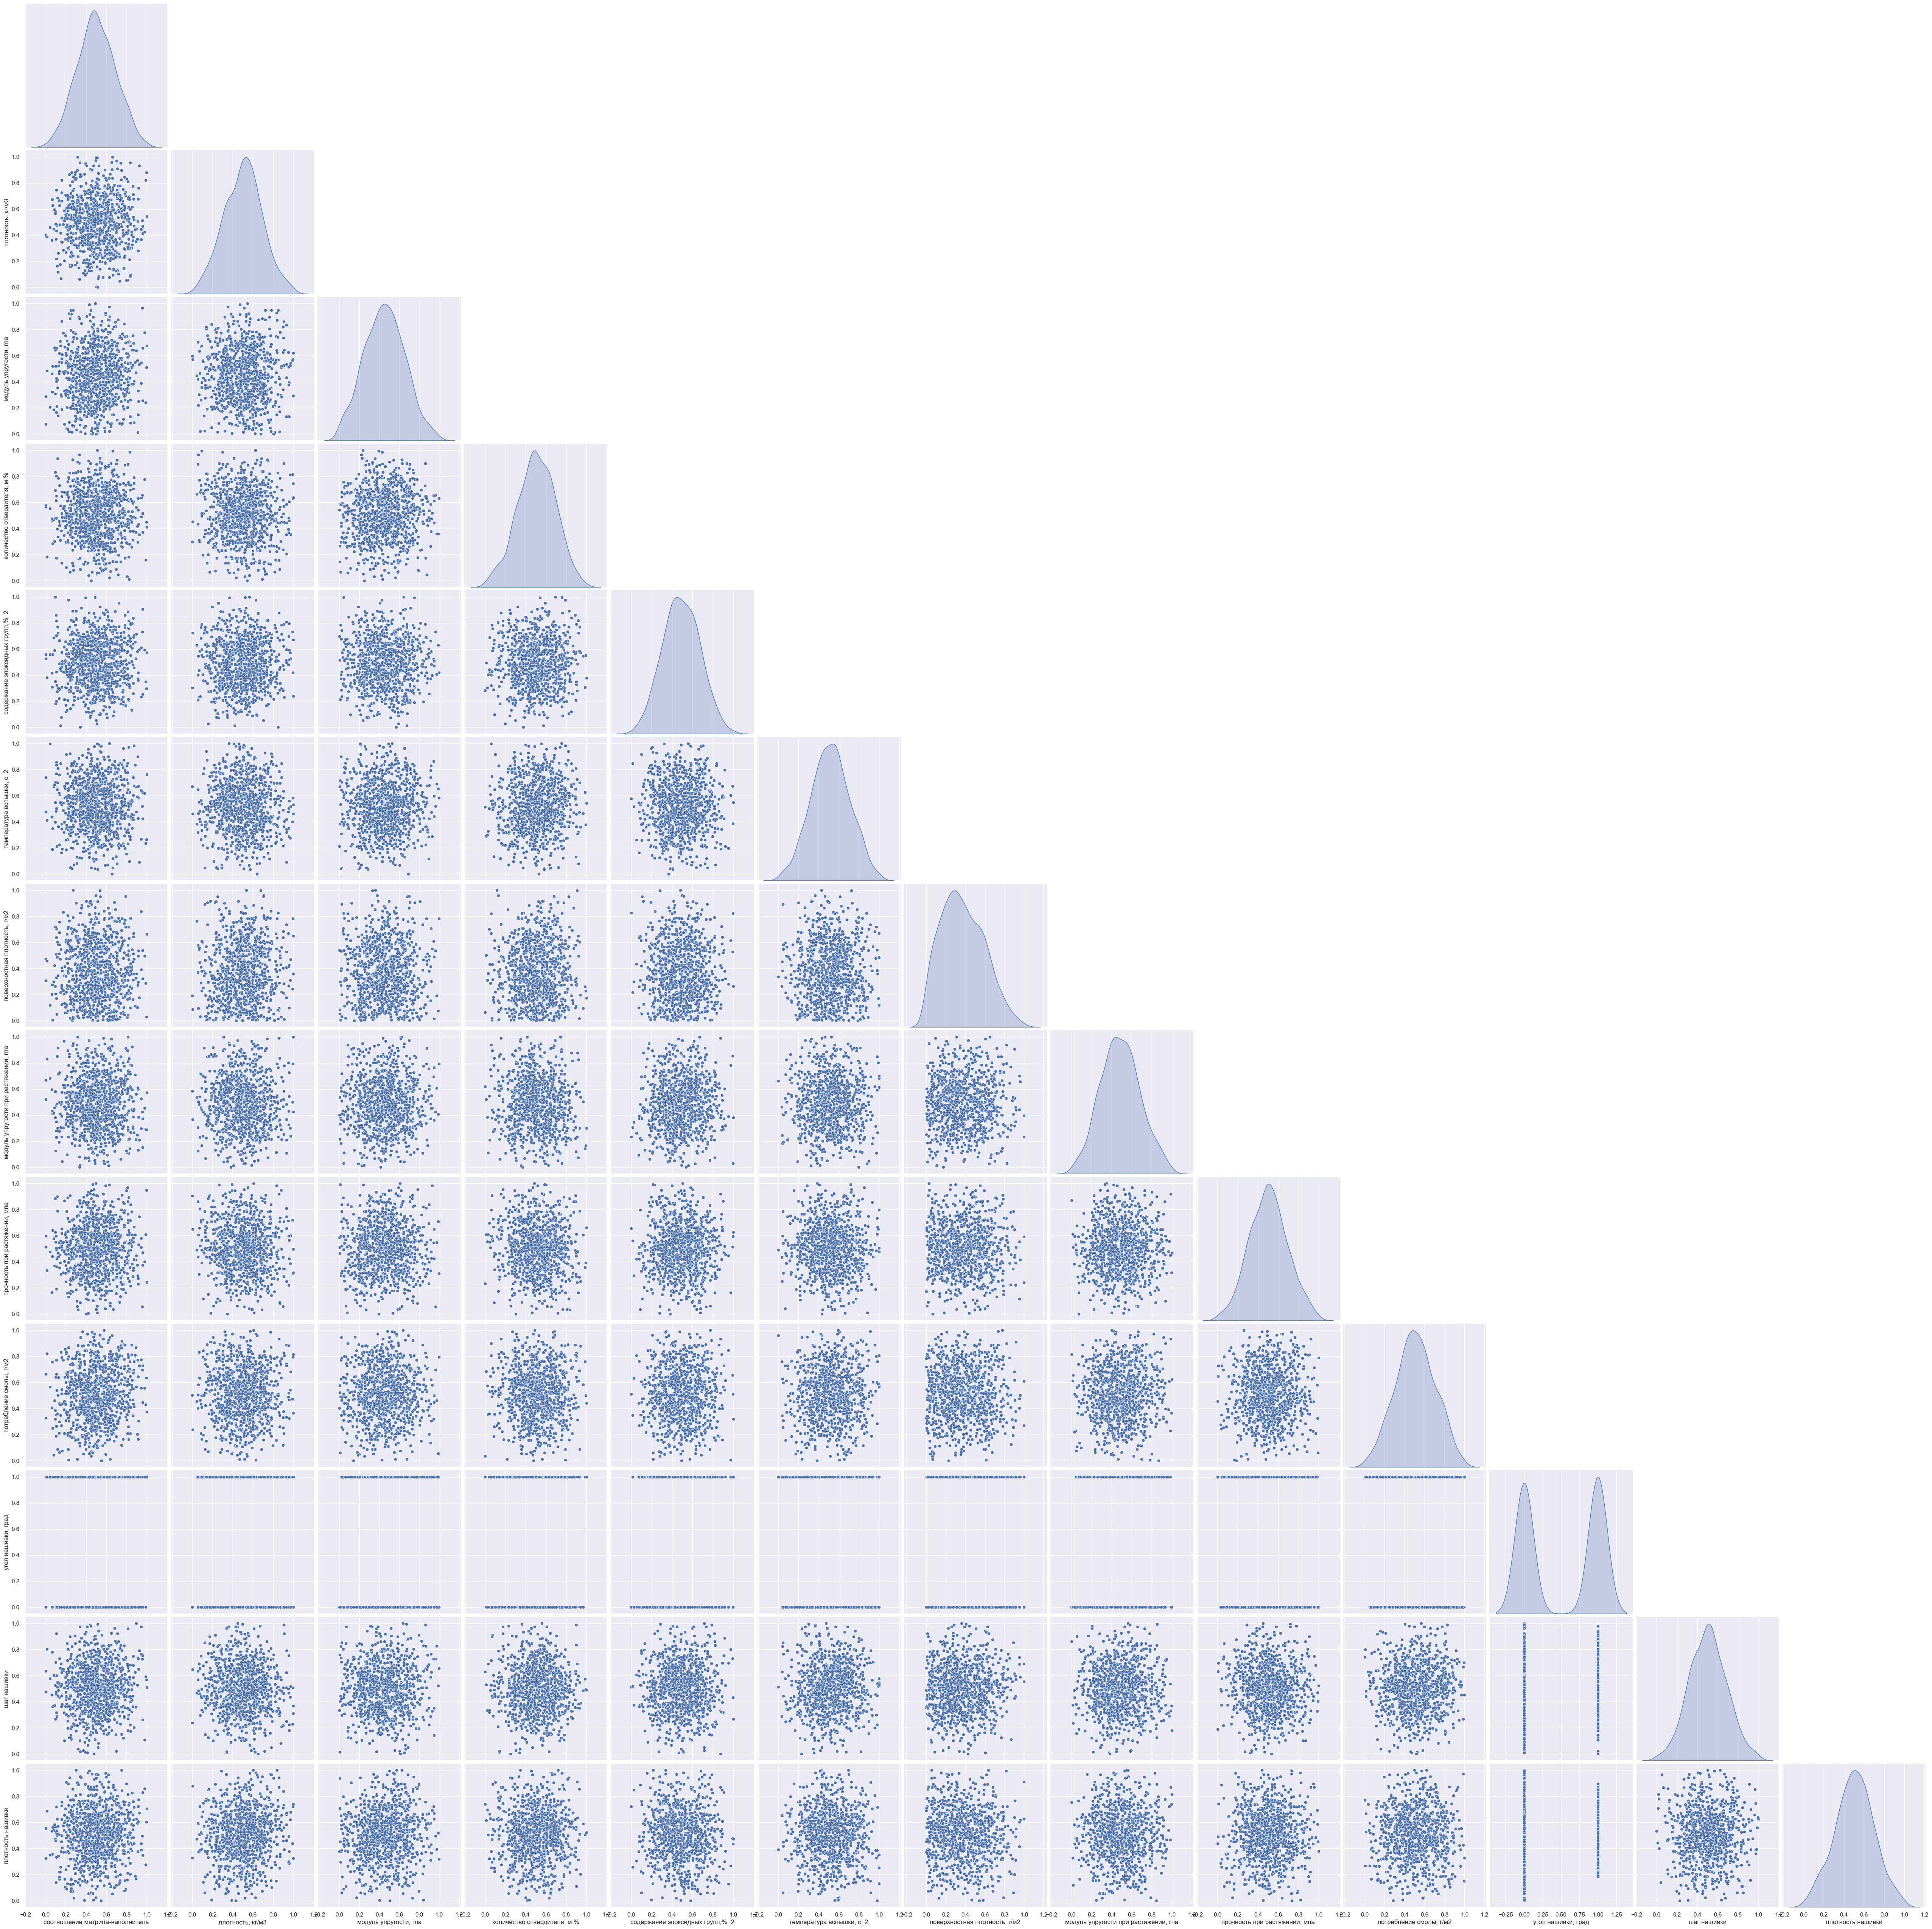

In [27]:
sns.pairplot(df_norm, height=4, diag_kind='kde', corner = True);

На графиках рассеяния точки расположены хаотично, закономерностей взаимосвязи между показателями не прослеживается.

Корреляция.

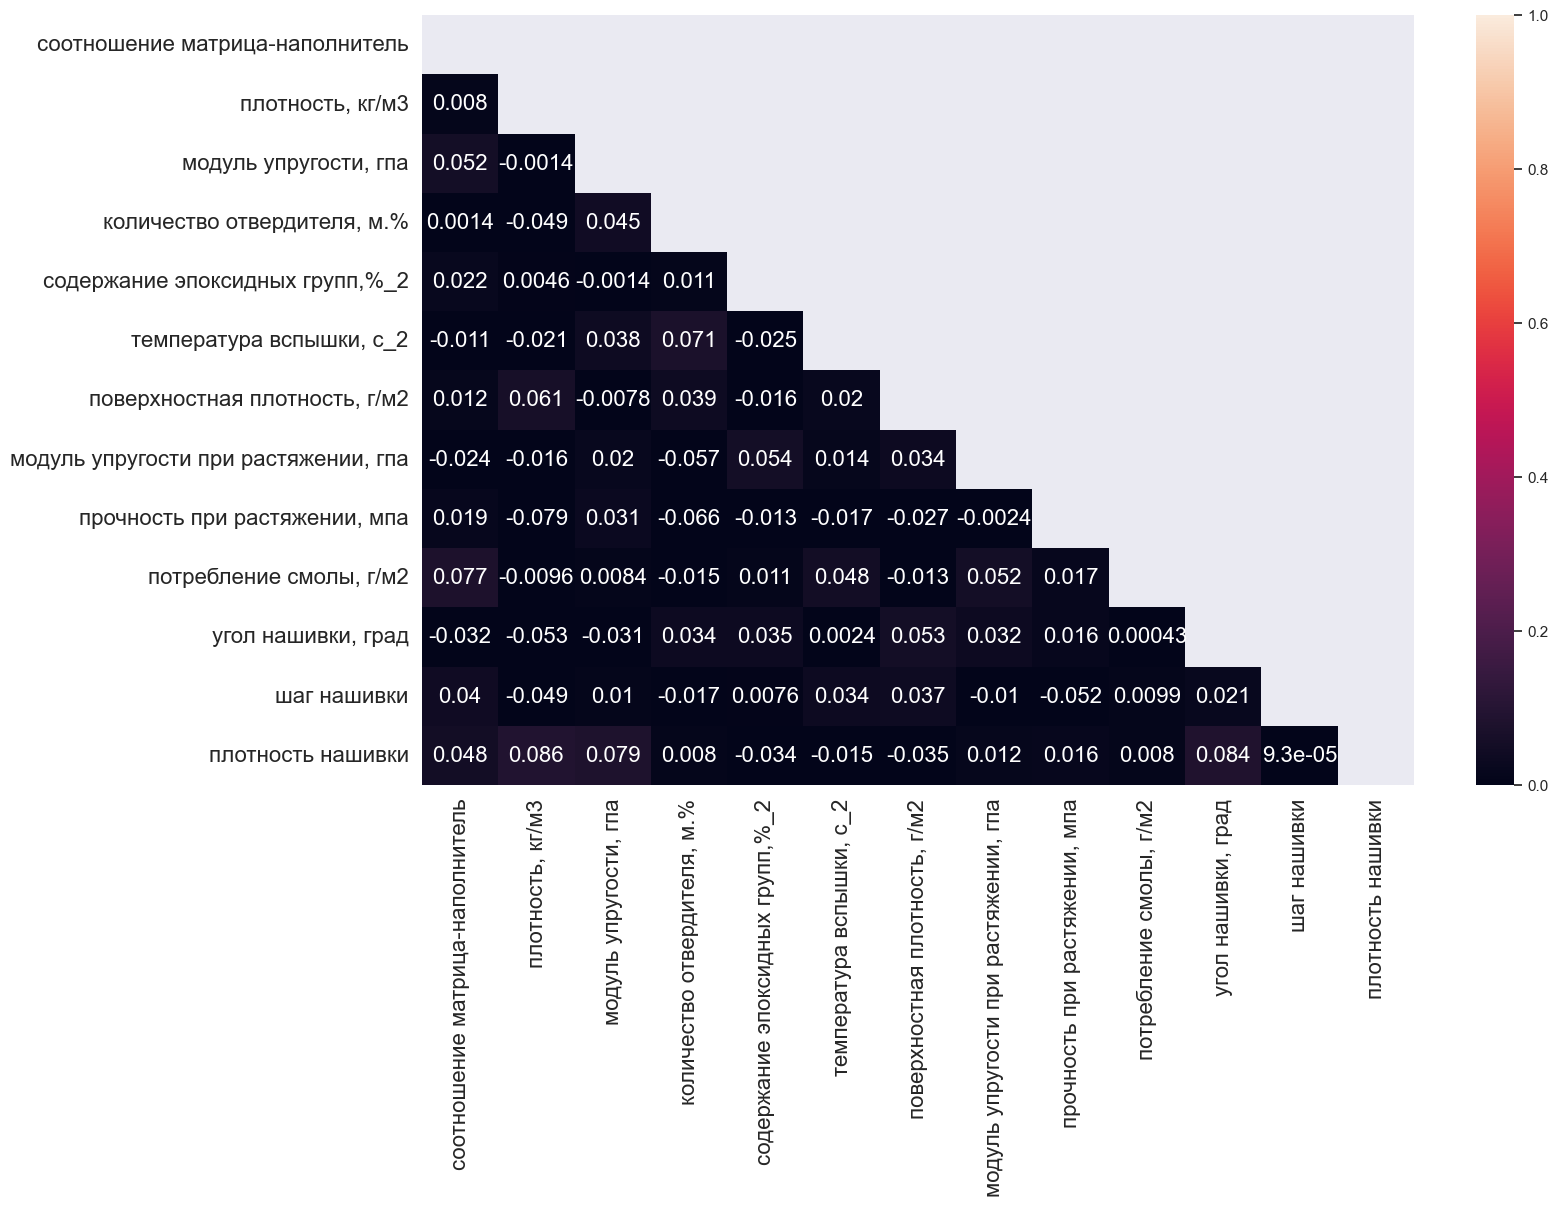

In [28]:
mask = np.zeros_like(df_norm.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
plt.figure(figsize=(16,10))
sns.heatmap(df_norm.corr(), mask=mask, vmin=0, vmax=1, annot=True, annot_kws={"size": 16})
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

Максимальное и минимальное зачения корреляции составляют 0,086 и -0,053, что меньше порогового значения, характеризующего наличие хотя бы минимальной взаимосвязи между исследуемы параметрами. Из чего можно сделать вывод, что корреляции между признаками нет. Что в свою очередь подтверждает выводы графика рассеяния.

# 3. Модели машинного обучения

Обучим алгоритмы машинного обучения, которые будут определять значения:

- модуля упругости при растяжении, ГПа.
- прочности при растяжении, МПа.

Для достижения наилучшего результата будем оценивать 5 моделей машинного обучения:
- линейная регрессия,
- "случайны лес",
- гадиентный бустинг,
- К ближайших соседей,
- метод опорных векторов. 

В качестве оценочного параметра используем метрику среднеквадратической ошибки (MSE).
MSE - это метрика, отражающая сумму квадратичных разниц между прогнозируемыми значениями и фактическими значениями в наборе данных, деленную на количество наблюдений по которым строится модель и количество прогнозов. Чем ниже MSE, тем лучше модель подходит для машинного обучения на наборе данных. К плюсам MSE относится то обстоятельство, что данную метрику качества модели можно использовать, как на нормализованных так и на ненормализованных данных.

MSE, как и алгоритмы обучения, будет использоваться для каждого параметра отдельно. Выбор такого подхода обусловлен тем, что для некоторых алгоритмов нет возможности определения сразу 2 результирующих параметров. 


Построим модели для прогноза модуля упругости при растяжении и прочности при растяжении.

## 3.1. Параметр "Модуль упругости при растяжении, ГПа"

Зададим переменные и разобьем данные на обучаемые и тестовые выборки в пропорции 7/3 с фиксированной выборкой random_state=10

In [29]:
feature_cols = df_norm.columns.drop(['модуль упругости при растяжении, гпа', 'прочность при растяжении, мпа'])

X = df_norm[feature_cols]
y = df_norm['модуль упругости при растяжении, гпа']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                test_size=0.3, random_state=10)

In [30]:
X

соотношение матрица-наполнитель  плотность, кг/м3  \
1                            0.274768          0.651097   
3                            0.274768          0.651097   
4                            0.466552          0.651097   
5                            0.465836          0.571539   
6                            0.424236          0.332865   
...                               ...               ...   
1018                         0.361662          0.444480   
1019                         0.607674          0.704373   
1020                         0.573391          0.498274   
1021                         0.662497          0.748688   
1022                         0.684036          0.280923   

      модуль упругости, гпа  количество отвердителя, м.%  \
1                  0.452951                     0.079153   
3                  0.452951                     0.630983   
4                  0.461725                     0.511257   
5                  0.458649                     0.511257   
6                  0.494944                     0.511257   
...                     ...                          ...   
1018               0.560064                     0.337550   
1019               0.272088                     0.749605   
1020               0.254927                     0.501991   
1021               0.454635                     0.717585   
1022               0.255222                     0.632264   

      содержание эпоксидных групп,%_2  температура вспышки, с_2  \
1                            0.607435                  0.509164   
3                            0.418887                  0.583596   
4                            0.495653                  0.509164   
5                            0.495653                  0.509164   
6                            0.495653                  0.509164   
...                               ...                       ...   
1018                         0.333908                  0.703458   
1019                         0.294428                  0.362087   
1020                         0.623085                  0.334063   
1021                         0.267818                  0.466417   
1022                         0.888354                  0.588206   

      поверхностная плотность, г/м2  потребление смолы, г/м2  \
1                          0.162230                 0.514688   
3                          0.162230                 0.514688   
4                          0.162230                 0.514688   
5                          0.162230                 0.514688   
6                          0.162230                 0.514688   
...                             ...                      ...   
1018                       0.161609                 0.183151   
1019                       0.271207                 0.157752   
1020                       0.572959                 0.572648   
1021                       0.496511                 0.434855   
1022                       0.587373                 0.426577   

      угол нашивки, град  шаг нашивки  плотность нашивки  
1                    0.0     0.289334           0.546433  
3                    0.0     0.362355           0.319758  
4                    0.0     0.362355           0.494123  
5                    0.0     0.362355           0.546433  
6                    0.0     0.362355           0.720799  
...                  ...          ...                ...  
1018                 1.0     0.660014           0.320103  
1019                 1.0     0.768759           0.437468  
1020                 1.0     0.301102           0.679468  
1021                 1.0     0.458245           0.516112  
1022                 1.0     0.441137           0.850430  

[922 rows x 11 columns]

In [31]:
y

1       0.272962
3       0.272962
4       0.272962
5       0.272962
6       0.272962
          ...   
1018    0.473553
1019    0.462512
1020    0.580201
1021    0.535317
1022    0.552644
Name: модуль упругости при растяжении, гпа, Length: 922, dtype: float64

Определим функции для всех моделей для удобства дальнейшего использования

In [32]:
# Функция для определения средеквадратической ошибки
def mse(y_test, y_pred):
    return mean_squared_error(y_test, y_pred) 

# Функция обученя и определения средеквадратической ошибки по тестовой выборке
def fit_and_evaluate(model):
    
    # Обучение модели
    model.fit(X, y)
    
    # Прогнозирование и расчет ошибки
    model_pred = model.predict(X_test)
    model_mse = mse(y_test, model_pred)
    
    # результат выполнения - рассчитанная ошибка
    return model_mse

### 3.1.1. Линейная регрессия.

In [33]:
lr = LinearRegression()
lr_mse = fit_and_evaluate(lr)

print('MSE линейной регрессии = %.4f' % lr_mse)

MSE линейной регрессии = 0.0393


Оптимизация регрессии, сокращение количества параметров.

P-value

In [34]:
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

coef  p-value
const                            0.456492    0.000
соотношение матрица-наполнитель  0.005354    0.898
плотность, кг/м3                -0.013437    0.748
модуль упругости, гпа            0.029533    0.456
количество отвердителя, м.%     -0.111745    0.009
содержание эпоксидных групп,%_2  0.065768    0.126
температура вспышки, с_2         0.002775    0.946
поверхностная плотность, г/м2    0.080182    0.022
потребление смолы, г/м2          0.053802    0.161
угол нашивки, град               0.007081    0.647
шаг нашивки                     -0.016634    0.698
плотность нашивки               -0.008997    0.824

При значении метрики P-value до 5%, показатель имеет влияние на y-параметр.

Согласно показателю P-value из всего набора параметров необходимо оставить "количество отвердителя, м.%" и "поверхностная плотность, г/м2".

VIF - variance inflation factor

In [35]:
variance_inflation_factor (exog=X_incl_const.values, exog_idx=1)

1.0154807561594614

In [36]:
vif =[variance_inflation_factor (exog=X_incl_const.values, 
                                 exog_idx=i) for i in range(X_incl_const.shape[1])]

pd.DataFrame({'coef_name': X_incl_const.columns,
             'vif':np.around(vif, 2)})

coef_name    vif
0                             const  62.70
1   соотношение матрица-наполнитель   1.02
2                  плотность, кг/м3   1.02
3             модуль упругости, гпа   1.02
4       количество отвердителя, м.%   1.02
5   содержание эпоксидных групп,%_2   1.01
6          температура вспышки, с_2   1.02
7     поверхностная плотность, г/м2   1.02
8           потребление смолы, г/м2   1.02
9                угол нашивки, град   1.02
10                      шаг нашивки   1.01
11                плотность нашивки   1.03

Показатель vif отражает наличие и силу коллинеарности между независимыми параметрами. Значение коэффициента больше 5 свидетельствует о зависимом влиянии показателей друг на друга, и чем они больше это значение, тем зависимость больше. В изучаемом наборе данных нет созависимых параметров.

Построим модель на двух показателях. Перед построением модели на 2 независимых показателях, расчитаем метрику сложности модели.
Чем меньше значение показателя BIC, тем проще используемая модель.

BIC

In [37]:
#Оригинальная модель со всеми показателями
X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

print("BIC = %.4f" % results.bic)

BIC = -215.1229


In [38]:
#Модель на 2 показателях: количество отвердителя, м.%, поверхностная плотность, г/м2. (p-value)
X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['соотношение матрица-наполнитель', 'плотность, кг/м3',
                'модуль упругости, гпа', 'содержание эпоксидных групп,%_2', 
                'температура вспышки, с_2', 'потребление смолы, г/м2', 
                'угол нашивки, град', 'шаг нашивки', 'плотность нашивки'],
                axis = 1)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

coef  p-value
const                          0.515757    0.000
количество отвердителя, м.%   -0.105905    0.012
поверхностная плотность, г/м2  0.076743    0.027

In [39]:
print("BIC %.4f" % results.bic)

BIC -267.6289


В результате сокращения количества параметров модели показатель BIC уменьшился, что говорит об упрощении модели.

In [40]:
# Создаем переменные X and y
feature_cols1 = ['количество отвердителя, м.%',
                 'поверхностная плотность, г/м2']

X1 = df_norm[feature_cols1]
y1 = df_norm['модуль упругости при растяжении, гпа']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1,
                                test_size=0.3, random_state=10)
regr1 = LinearRegression()
regr1.fit(X_train1, y_train1)

y_pred1 = regr1.predict(X_test1)
y_train_pred1 = regr1.predict(X_train1)

print("MSE оптимизированной линейной регрессии = %.4f" % mean_squared_error(y_test1, y_pred1))

MSE оптимизированной линейной регрессии = 0.0408


 В результате уменьшения количества параметров набора данных значение метрики BIC уменьшилось с -215 до -268, что свидетельствует об упрощении модели. При этом метрика MSE увеличилась, что свидетельствует об ухудшении качества модели.
 
 В сравнительном анализе будет использоваться метрика MSE для всех независимых переменных.

### 3.1.2. Градиентный бустинг

In [41]:
gradient_boosted = GradientBoostingRegressor(random_state=10)
gradient_boosted_mse = fit_and_evaluate(gradient_boosted)

print('MSE градиентного бустинга = %0.4f' % gradient_boosted_mse)

MSE градиентного бустинга = 0.0252


### 3.1.3. Метод опорных векторов

In [42]:
svm = SVR(C = 1000, gamma = 0.1)
svm_mse = fit_and_evaluate(svm)

print('MSE метода опорных векторов = %0.4f' % svm_mse)

MSE метода опорных векторов = 0.0275


### 3.1.4. "Случайный лес"

In [43]:
random_forest = RandomForestRegressor(random_state=10)
random_forest_mse = fit_and_evaluate(random_forest)

print('MSE "случайного леса" = %0.4f' % random_forest_mse)

MSE "случайного леса" = 0.0061


### 3.1.5. Регрессия k-ближайших соседей

In [44]:
knn = KNeighborsRegressor(n_neighbors=10)
knn_mse = fit_and_evaluate(knn)

print('MSE регрессии k-ближайших соседей = %0.4f' % knn_mse)

MSE регрессии k-ближайших соседей = 0.0358


Построим модели по методу опорных векторов, "случайный лес", регрессии  k-ближайших соседей с поиском гиперпараметров модели с помощью поиска по сетке с перекрестной проверкой, количество блоков равно 10.

### 3.1.6. "Случайный лес" (поиск по сетке с перекрестной проверкой, количество блоков равно 10)

In [45]:
model = RandomForestRegressor(random_state=10)
grid = {
    'n_estimators' : range(1, 100, 5),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : range(1, 5, 1),
    'criterion':['mse']
}

# модель для оптимизации
gsc = GridSearchCV(model, grid, n_jobs=-1, cv=10)
gsc.fit(X_train,  y_train)
model = gsc.best_estimator_
model.fit(X_train,  y_train)
y_pred = model.predict(X_test)
random_forest_mse_cv10 = mean_squared_error(y_test,y_pred)
print('MSE "случайного леса"(cv=10) = %0.4f' % random_forest_mse_cv10)

MSE "случайного леса"(cv=10) = 0.0395


### 3.1.7. Регрессия k-ближайших соседей (поиск по сетке с перекрестной проверкой, количество блоков равно 10)

In [46]:
model = KNeighborsRegressor()
grid = {'n_neighbors' : range(1, 101, 1), 
          'weights' : ['uniform', 'distance'],
          'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
          }

gsc = GridSearchCV(model, grid, n_jobs=-1, cv=10, verbose = 1)
gsc.fit(X_train, y_train)
model = gsc.best_estimator_
model.fit(X_train,  y_train)
y_pred = model.predict(X_test)
knn_mse_cv10 = mean_squared_error(y_test, y_pred)
print('MSE регрессии k-ближайших соседей(cv=10) = %0.4f' % knn_mse_cv10)

Fitting 10 folds for each of 800 candidates, totalling 8000 fits
MSE регрессии k-ближайших соседей(cv=10) = 0.0402


Визуализация сравнения моделей для параметра "Модуль упругости при растяжении, ГПа".

<Figure size 1100x700 with 0 Axes>

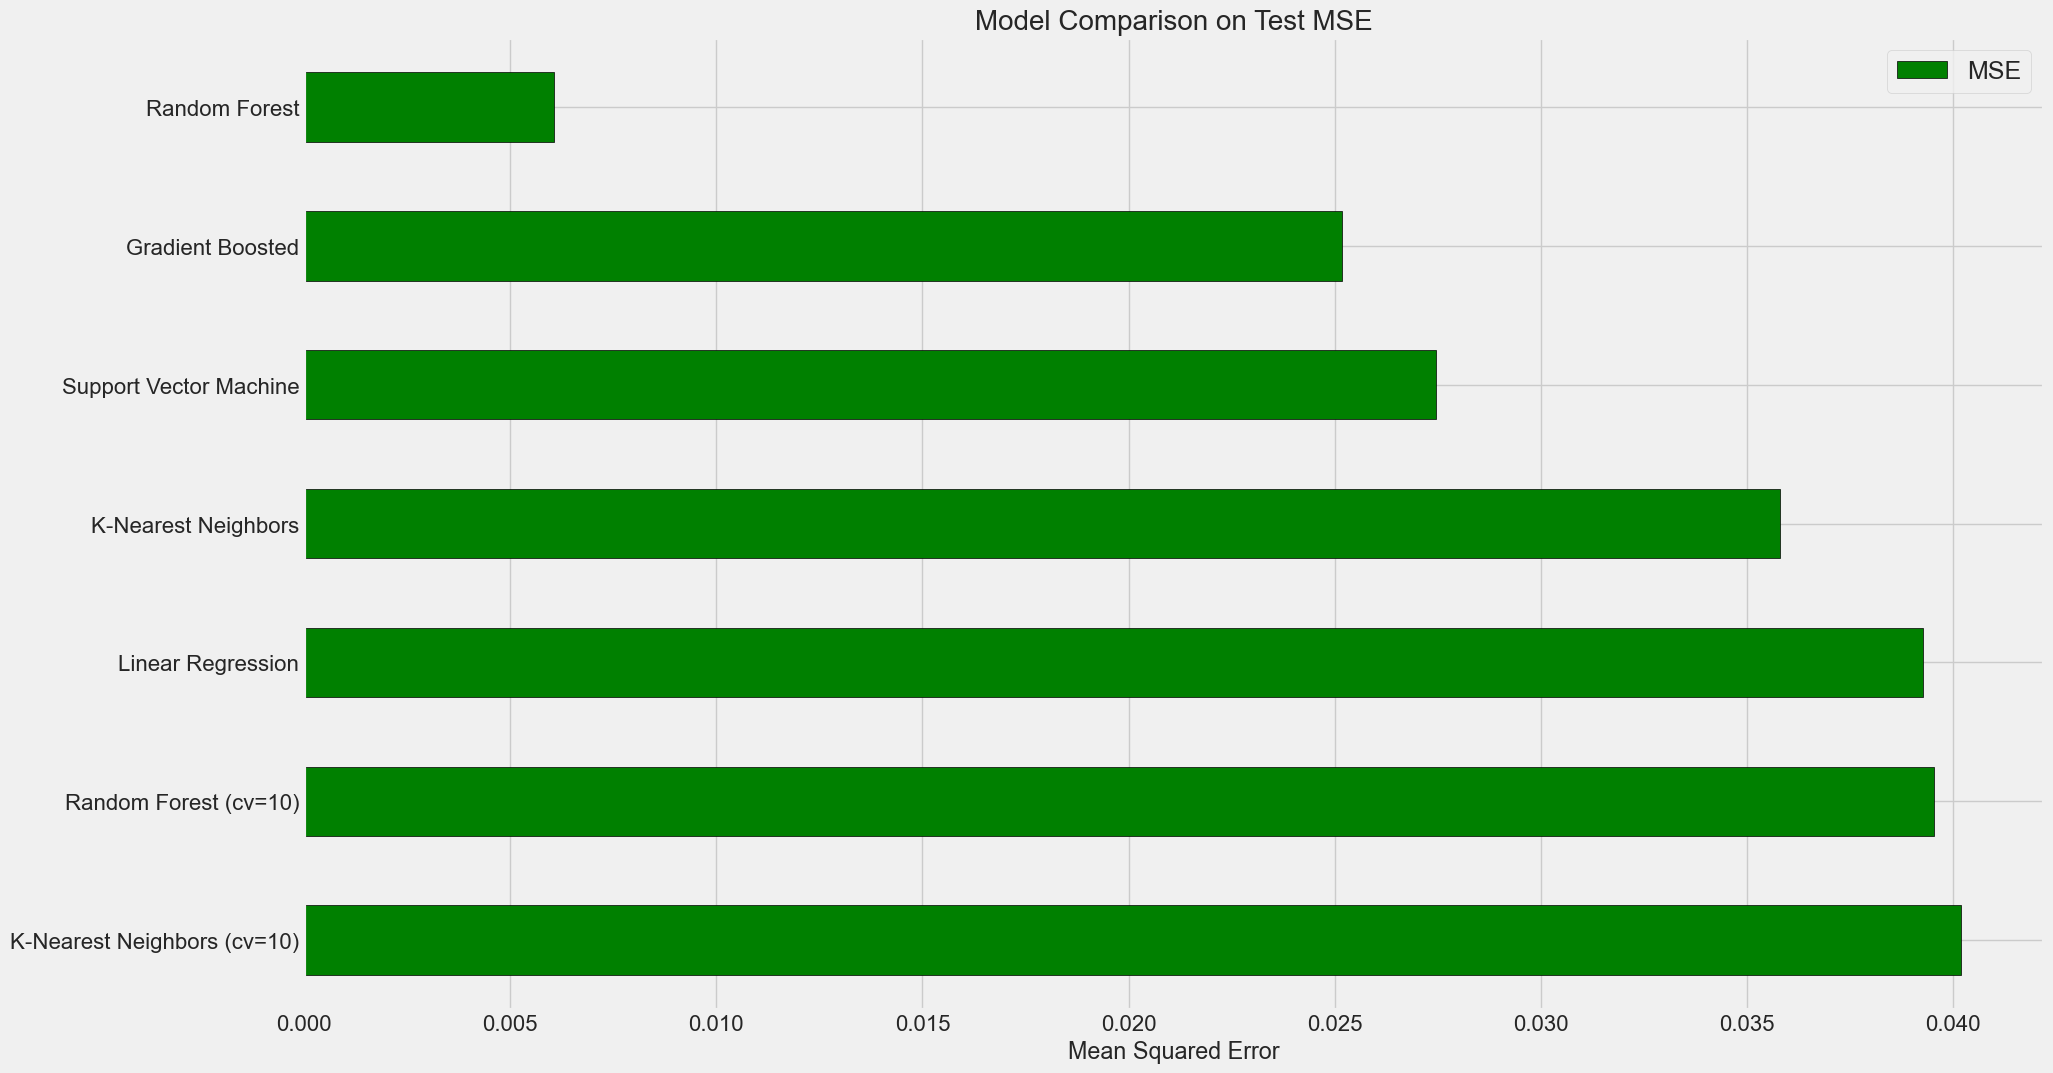

In [47]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(11, 7))

# Набор данных на основе полученных результатов
model_comparison = pd.DataFrame({'model': ['Linear Regression', 'Support Vector Machine',
                                           'Random Forest', 'Gradient Boosted',
                                           'K-Nearest Neighbors', 'Random Forest (cv=10)',
                                           'K-Nearest Neighbors (cv=10)'],
                                 'MSE': [lr_mse, svm_mse, random_forest_mse,
                                         gradient_boosted_mse, knn_mse, random_forest_mse_cv10,
                                         knn_mse_cv10]})
model_comparison
  
# Сравнительная горизонтальная столбчатая диаграмма метрики MSE
model_comparison.sort_values('MSE', ascending = False).plot(x = 'model', y = 'MSE', kind = 'barh',
                                                           color = 'green', edgecolor = 'black')

# Построение диаграммы
plt.ylabel(''); plt.yticks(size = 16); plt.xlabel('Mean Squared Error'); plt.xticks(size = 16)
plt.legend(loc=1, prop={'size': 18})
plt.title('Model Comparison on Test MSE', size = 20);

Выводы: 
1. Для прогнозирования показателю "Модуль упругости при растяжении, ГПа" лучше всего подходит модель "случайный лес" с показателем среднеквадратической ошибки MSE - 0,0061.
2. Хуже всего с задачей прогнозирования, справилась модель линейной регрессии, с показателем MSE - 0.0393 и модели с поиском по сетке с перекрестной проверкой, количество блоков равно 10, на основе "случайного леса" и k-ближайших соседей - 0,0395 и 0,0402 соответственно.

## 3.2. Параметр "Прочность при растяжении, МПа"

Зададим переменные и разобьем данные на обученные и тестовые в пропорции 7/3 с фиксированной выборкой random_state=10

In [48]:
feature_cols = df_norm.columns.drop(['модуль упругости при растяжении, гпа', 'прочность при растяжении, мпа'])

X = df_norm[feature_cols]
y = df_norm['прочность при растяжении, мпа']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                test_size=0.3, random_state=10)

In [49]:
X

соотношение матрица-наполнитель  плотность, кг/м3  \
1                            0.274768          0.651097   
3                            0.274768          0.651097   
4                            0.466552          0.651097   
5                            0.465836          0.571539   
6                            0.424236          0.332865   
...                               ...               ...   
1018                         0.361662          0.444480   
1019                         0.607674          0.704373   
1020                         0.573391          0.498274   
1021                         0.662497          0.748688   
1022                         0.684036          0.280923   

      модуль упругости, гпа  количество отвердителя, м.%  \
1                  0.452951                     0.079153   
3                  0.452951                     0.630983   
4                  0.461725                     0.511257   
5                  0.458649                     0.511257   
6                  0.494944                     0.511257   
...                     ...                          ...   
1018               0.560064                     0.337550   
1019               0.272088                     0.749605   
1020               0.254927                     0.501991   
1021               0.454635                     0.717585   
1022               0.255222                     0.632264   

      содержание эпоксидных групп,%_2  температура вспышки, с_2  \
1                            0.607435                  0.509164   
3                            0.418887                  0.583596   
4                            0.495653                  0.509164   
5                            0.495653                  0.509164   
6                            0.495653                  0.509164   
...                               ...                       ...   
1018                         0.333908                  0.703458   
1019                         0.294428                  0.362087   
1020                         0.623085                  0.334063   
1021                         0.267818                  0.466417   
1022                         0.888354                  0.588206   

      поверхностная плотность, г/м2  потребление смолы, г/м2  \
1                          0.162230                 0.514688   
3                          0.162230                 0.514688   
4                          0.162230                 0.514688   
5                          0.162230                 0.514688   
6                          0.162230                 0.514688   
...                             ...                      ...   
1018                       0.161609                 0.183151   
1019                       0.271207                 0.157752   
1020                       0.572959                 0.572648   
1021                       0.496511                 0.434855   
1022                       0.587373                 0.426577   

      угол нашивки, град  шаг нашивки  плотность нашивки  
1                    0.0     0.289334           0.546433  
3                    0.0     0.362355           0.319758  
4                    0.0     0.362355           0.494123  
5                    0.0     0.362355           0.546433  
6                    0.0     0.362355           0.720799  
...                  ...          ...                ...  
1018                 1.0     0.660014           0.320103  
1019                 1.0     0.768759           0.437468  
1020                 1.0     0.301102           0.679468  
1021                 1.0     0.458245           0.516112  
1022                 1.0     0.441137           0.850430  

[922 rows x 11 columns]

In [50]:
y

1       0.727777
3       0.727777
4       0.727777
5       0.727777
6       0.727777
          ...   
1018    0.472912
1019    0.461722
1020    0.587558
1021    0.341643
1022    0.668015
Name: прочность при растяжении, мпа, Length: 922, dtype: float64

### 3.2.1. Линейная регрессия.

In [51]:
lr = LinearRegression()
lr_mse = fit_and_evaluate(lr)

print('MSE линейной регрессии = %.4f' % lr_mse)

MSE линейной регрессии = 0.0370


### 3.2.2.  Градиентный бустинг

In [52]:
gradient_boosted = GradientBoostingRegressor(random_state=10)
gradient_boosted_mse = fit_and_evaluate(gradient_boosted)

print('MSE градиентного бустинга = %0.4f' % gradient_boosted_mse)

MSE градиентного бустинга = 0.0212


### 3.2.3.  Метод опорных векторов

In [53]:
svm = SVR(C = 1000, gamma = 0.1)
svm_mse = fit_and_evaluate(svm)

print('MSE метода опорных векторов = %0.4f' % svm_mse)

MSE метода опорных векторов = 0.0287


### 3.2.4.  "Случайный лес"

In [54]:
random_forest = RandomForestRegressor(random_state=10)
random_forest_mse = fit_and_evaluate(random_forest)

print('MSE "случайного леса" = %0.4f' % random_forest_mse)

MSE "случайного леса" = 0.0056


### 3.2.5.  Регрессия k-ближайших соседей

In [55]:
knn = KNeighborsRegressor(n_neighbors=10)
knn_mse = fit_and_evaluate(knn)

print('MSE регрессии k-ближайших соседей = %0.4f' % knn_mse)

MSE регрессии k-ближайших соседей = 0.0329


### 3.2.6.  "Случайный лес" (поиск по сетке с перекрестной проверкой, количество блоков равно 10)

In [56]:
model = RandomForestRegressor(random_state=10)
grid = {
    'n_estimators' : range(1, 100, 5),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : range(1, 5, 1),
    'criterion':['mse']
}

# модель для оптимизации
gsc = GridSearchCV(model, grid, n_jobs=-1, cv=10)
gsc.fit(X_train,  y_train)
model = gsc.best_estimator_
model.fit(X_train,  y_train)
y_pred = model.predict(X_test)
random_forest_mse_cv10 = mean_squared_error(y_test,y_pred)
print('MSE "случайного леса"(cv=10) = %0.4f' % random_forest_mse_cv10)

MSE "случайного леса"(cv=10) = 0.0378


### 3.2.7.  Регрессия k-ближайших соседей (поиск по сетке с перекрестной проверкой, количество блоков равно 10)

In [57]:
model = KNeighborsRegressor()
grid = {'n_neighbors' : range(1, 101, 1), 
          'weights' : ['uniform', 'distance'],
          'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
          }

gsc = GridSearchCV(model, grid, n_jobs=-1, cv=10, verbose = 1)
gsc.fit(X_train, y_train)
model = gsc.best_estimator_
model.fit(X_train,  y_train)
y_pred = model.predict(X_test)
knn_mse_cv10 = mean_squared_error(y_test, y_pred)
print('MSE регрессии k-ближайших соседей(cv=10) = %0.4f' % knn_mse_cv10)

Fitting 10 folds for each of 800 candidates, totalling 8000 fits
MSE регрессии k-ближайших соседей(cv=10) = 0.0377


### Визуализация сравнения моделей для параметра "Прочность при растяжении, МПа".

<Figure size 1100x700 with 0 Axes>

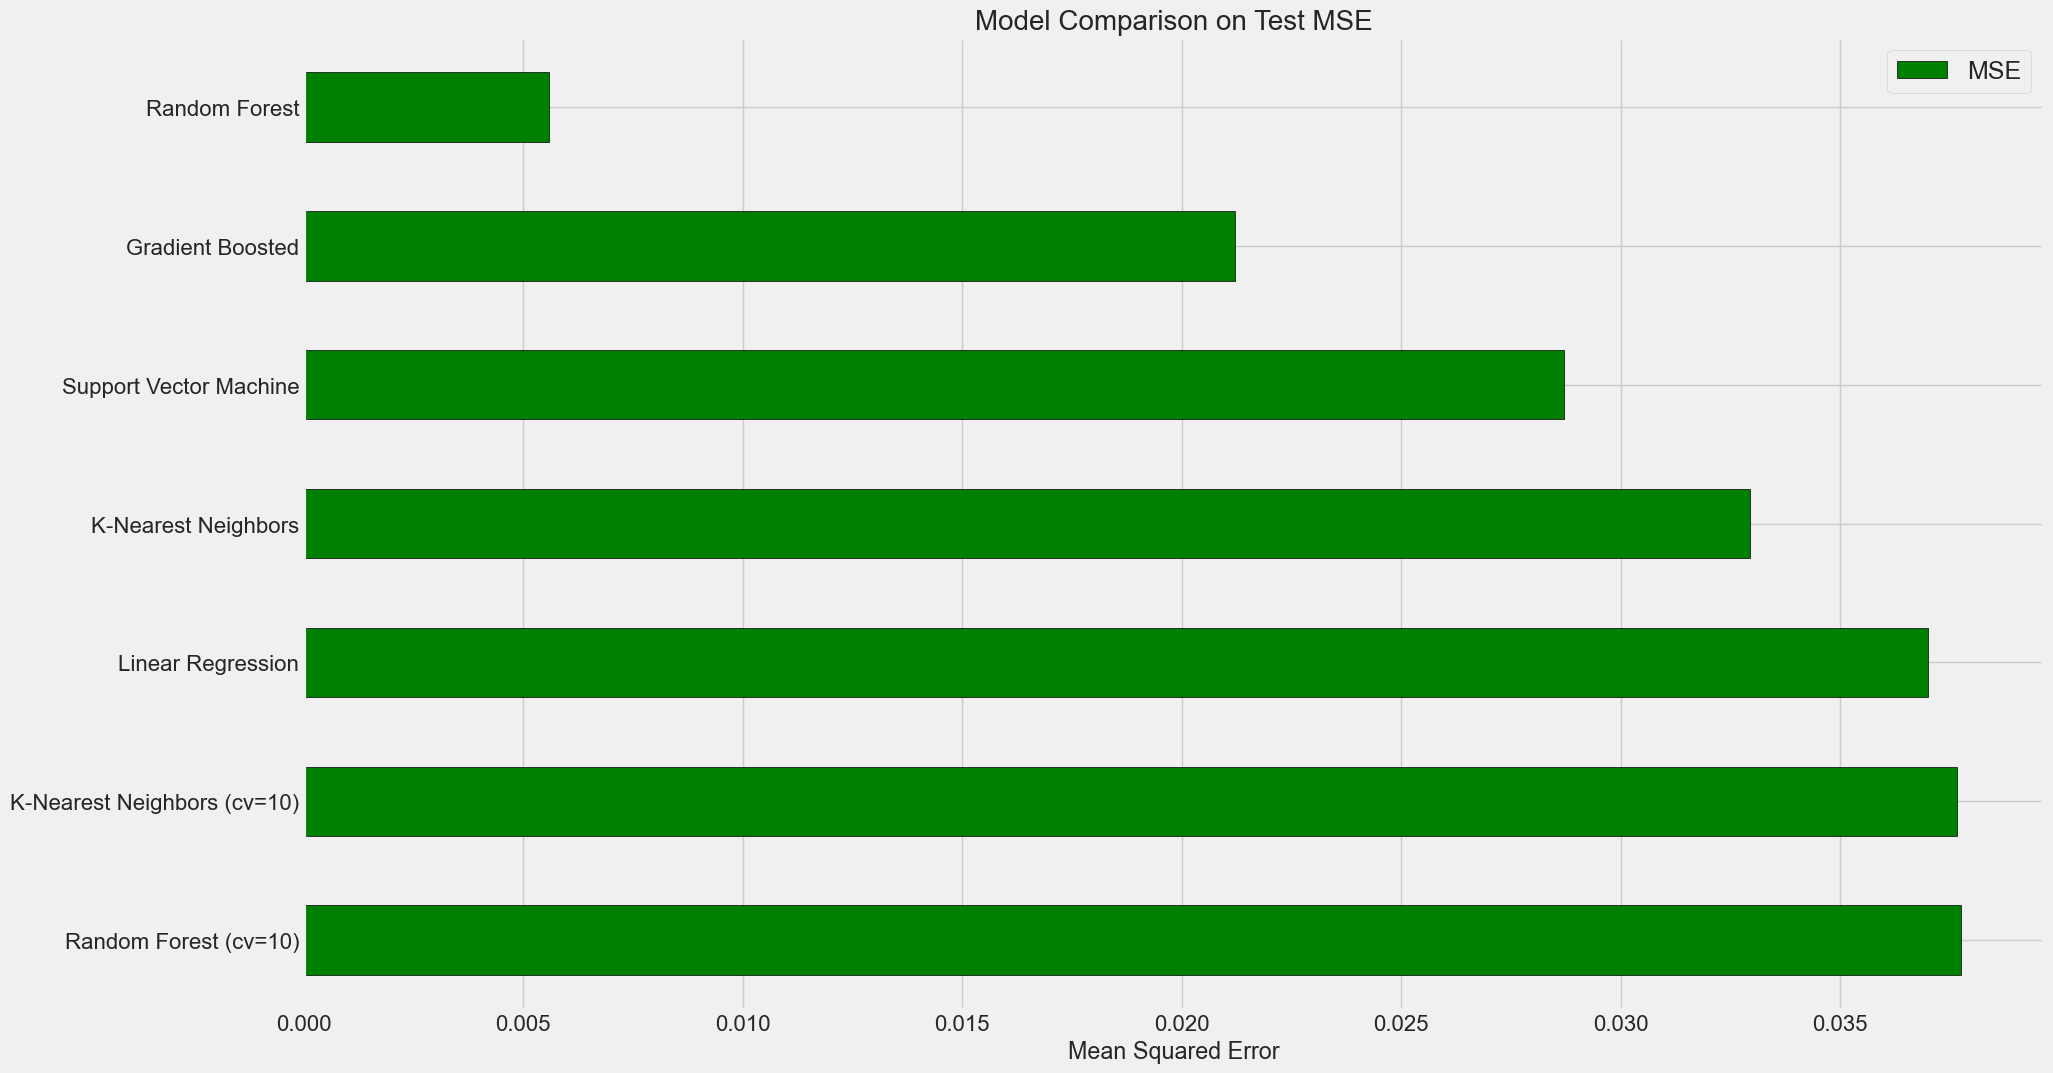

In [59]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(11, 7))

# Набор данных на основе полученных результатов
model_comparison = pd.DataFrame({'model': ['Linear Regression', 'Support Vector Machine',
                                           'Random Forest', 'Gradient Boosted',
                                           'K-Nearest Neighbors', 'Random Forest (cv=10)',
                                           'K-Nearest Neighbors (cv=10)'],
                                 'MSE': [lr_mse, svm_mse, random_forest_mse,
                                         gradient_boosted_mse, knn_mse, random_forest_mse_cv10,
                                         knn_mse_cv10]})
model_comparison
  
# Сравнительная горизонтальная столбчатая диаграмма метрики MSE
model_comparison.sort_values('MSE', ascending = False).plot(x = 'model', y = 'MSE', kind = 'barh',
                                                           color = 'green', edgecolor = 'black')

# Построение диаграммы
plt.ylabel(''); plt.yticks(size = 16); plt.xlabel('Mean Squared Error'); plt.xticks(size = 16)
plt.legend(loc=1, prop={'size': 18})
plt.title('Model Comparison on Test MSE', size = 20);

Выводы: 
1. Для прогнозирования показателю "Прочность при растяжении, МПа", как и для показателя "Модуль упругости при растяжении, ГПа" лучше всего подходит модель "случайный лес" с показателем среднеквадратической ошибки MSE близкому по значению с модулем упругости при растяжении, ГПа - 0,0056.
2. Хуже всего с задачей прогнозирования, аналогично показателю "Модуль упругости при растяжении, ГПа", справилась модель линейной регрессии, с показателем MSE - 0,0370 и модели с поиском по сетке с перекрестной проверкой, количество блоков равно 10, на основе "случайного леса" и k-ближайших соседей - 0,0378 и 0,0377 соответственно.

# 4. Рекомендательная нейронная сеть для параметра "Соотношение матрица-наполнитель"

Посмотрим на описание набора данных.

In [60]:
df.describe().T

count         mean         std  \
соотношение матрица-наполнитель       922.0     2.927964    0.895472   
плотность, кг/м3                      922.0  1974.118744   71.040648   
модуль упругости, гпа                 922.0   736.119982  327.607008   
количество отвердителя, м.%           922.0   111.136066   26.753228   
содержание эпоксидных групп,%_2       922.0    22.200570    2.393926   
температура вспышки, с_2              922.0   286.181128   39.420764   
поверхностная плотность, г/м2         922.0   482.429070  280.437329   
модуль упругости при растяжении, гпа  922.0    73.303464    3.025864   
прочность при растяжении, мпа         922.0  2461.491315  453.564734   
потребление смолы, г/м2               922.0   218.048059   57.137475   
угол нашивки, град                    922.0     0.510846    0.500154   
шаг нашивки                           922.0     6.931939    2.514184   
плотность нашивки                     922.0    57.562887   11.122204   

                                              min          25%          50%  \
соотношение матрица-наполнитель          0.547391     2.320191     2.907832   
плотность, кг/м3                      1784.482245  1923.318006  1977.321002   
модуль упругости, гпа                    2.436909   498.538615   736.178435   
количество отвердителя, м.%             38.668500    92.856591   111.162090   
содержание эпоксидных групп,%_2         15.695894    20.556328    22.177681   
температура вспышки, с_2               179.374391   259.205321   286.220763   
поверхностная плотность, г/м2            0.603740   264.345872   457.732246   
модуль упругости при растяжении, гпа    65.793845    71.241213    73.247594   
прочность при растяжении, мпа         1250.392802  2148.175736  2455.974462   
потребление смолы, г/м2                 72.530873   179.875097   218.697660   
угол нашивки, град                       0.000000     0.000000     1.000000   
шаг нашивки                              0.037639     5.143644     6.972862   
плотность нашивки                       28.661632    50.275385    57.584225   

                                              75%          max  
соотношение матрица-наполнитель          3.549367     5.314144  
плотность, кг/м3                      2020.053266  2161.565216  
модуль упругости, гпа                  956.955626  1628.000000  
количество отвердителя, м.%            130.109815   181.828448  
содержание эпоксидных групп,%_2         23.956980    28.955094  
температура вспышки, с_2               313.012786   386.067992  
поверхностная плотность, г/м2          695.531920  1291.340115  
модуль упругости при растяжении, гпа    75.310130    81.203147  
прочность при растяжении, мпа         2751.233766  3654.434359  
потребление смолы, г/м2                256.623860   359.052220  
угол нашивки, град                       1.000000     1.000000  
шаг нашивки                              8.612094    13.732404  
плотность нашивки                       64.840898    86.012427

Зададим переменные и разобьем данные на обучаемые и тестовые выборки в пропорции 7/3 с фиксированной выборкой random_state=10.

In [61]:
y_ns3 = df_norm['соотношение матрица-наполнитель']
X_ns3 = df_norm.drop(['соотношение матрица-наполнитель'], axis = 1)

X_train_ns3, X_test_ns3, y_train_ns3, y_test_ns3 = train_test_split(X_ns3, y_ns3, test_size=0.3, random_state=10)
y_ns3.shape, X_ns3.shape

((922,), (922, 12))

Данные разбиты корректно, размерность зависимой и независимых переменных соответствует друг другу по количеству строк. 

Создадим функции, которые визиализируют график процесса обучения модели и соотношения предсказанных и тестовых данных.

In [62]:
def predicted_ns3(y_test_ns3, y_pred_ns3):
    plt.figure(figsize=(15,9))
    plt.title(f'Тест и прогноз. Соотношение М-Н: ')
    plt.plot(y_test_ns3.to_numpy(), label='Тест')
    plt.plot(y_pred_ns3, label='Прогноз')
    plt.legend(loc='best')
    plt.ylabel('н')
    plt.xlabel('Порядок')

In [63]:
def plot_loss_ns3(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 0.5])
    plt.xlabel('Эпоха')
    plt.ylabel('MAE')
    plt.legend()
    plt.grid(True)

Зададим слои нейронной сети.

In [64]:
model_ns3 = Sequential()
model_ns3.add(Dense(128, input_dim=X_ns3.shape[1], activation='relu'))
model_ns3.add(Dense(128, activation='relu'))
model_ns3.add(Dropout(0.12))
model_ns3.add(Dense(128, activation='relu'))
model_ns3.add(Dropout(0.12))
model_ns3.add(Dense(64, activation='relu'))
model_ns3.add(Dense(32, activation='softmax'))
model_ns3.add(Dense(1))

Сеть состоит из 6 слоев со 128 нейронами на первых 3 слоях. Начиная с 4го слоя количество нейронов усменьшается на каждом последующем слое. 2 слоя "dropout" для предотвращения переобучения. Активационной функцией внутренних слоев является "relu". На выходе используется активатор "softmax".
Выбор обусловлен лучшей практикой использования активационных функций в нейронных сетях.

Посмотрим архитектуру модели. Скомпилируем и обучим модель нейронной сети.

In [65]:
model_ns3.summary()
dfmodel = model_ns3.compile(optimizer='adam', loss='mae', metrics=['mae'])
history = model_ns3.fit(
    X_train_ns3,
    y_train_ns3,
    epochs=100,
    validation_data = (X_test_ns3, y_test_ns3),
    verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1664      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2

Epoch 52/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1485 - mae: 0.1485 - val_loss: 0.1559 - val_mae: 0.1559
Epoch 53/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1484 - mae: 0.1484 - val_loss: 0.1559 - val_mae: 0.1559
Epoch 54/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1483 - mae: 0.1483 - val_loss: 0.1560 - val_mae: 0.1560
Epoch 55/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1484 - mae: 0.1484 - val_loss: 0.1559 - val_mae: 0.1559
Epoch 56/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1485 - mae: 0.1485 - val_loss: 0.1559 - val_mae: 0.1559
Epoch 57/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1484 - mae: 0.1484 - val_loss: 0.1559 - val_mae: 0.1559
Epoch 58/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1487 - mae: 0.1487 - val_loss: 0.1559 - val_mae: 0.1559
Epoch 59/100
21/21 [==============================] - 0s 2ms/step - loss: 0.

In [66]:
model_ns3.evaluate(X_train_ns3, y_train_ns3)

21/21 [==============================] - 0s 766us/step - loss: 0.1484 - mae: 0.1484


[0.14837156236171722, 0.14837156236171722]

редняя абсолютная ошибка составила 0.1484.

Визуализируем график процесса обучения по эпохам.

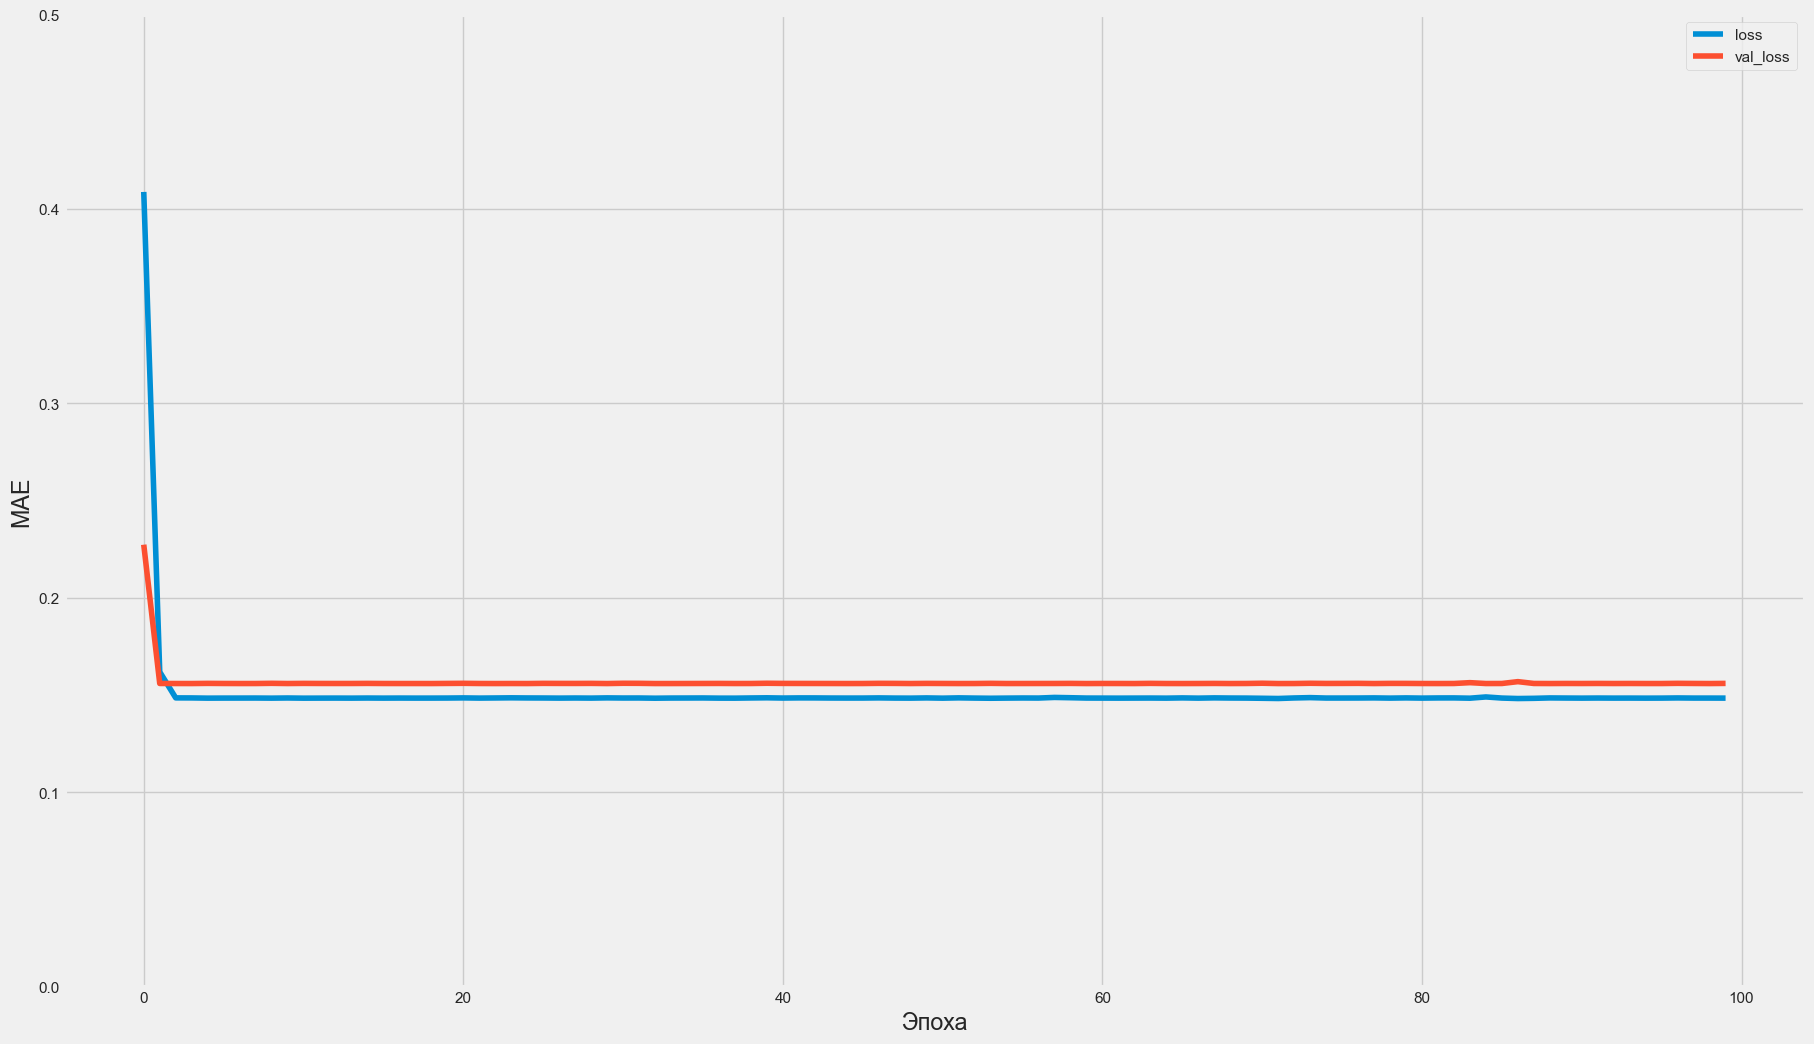

In [67]:
plot_loss_ns3(history)

Визуализируем график сопоставления прогнозных и тестовых данных.

9/9 [==============================] - 0s 935us/step


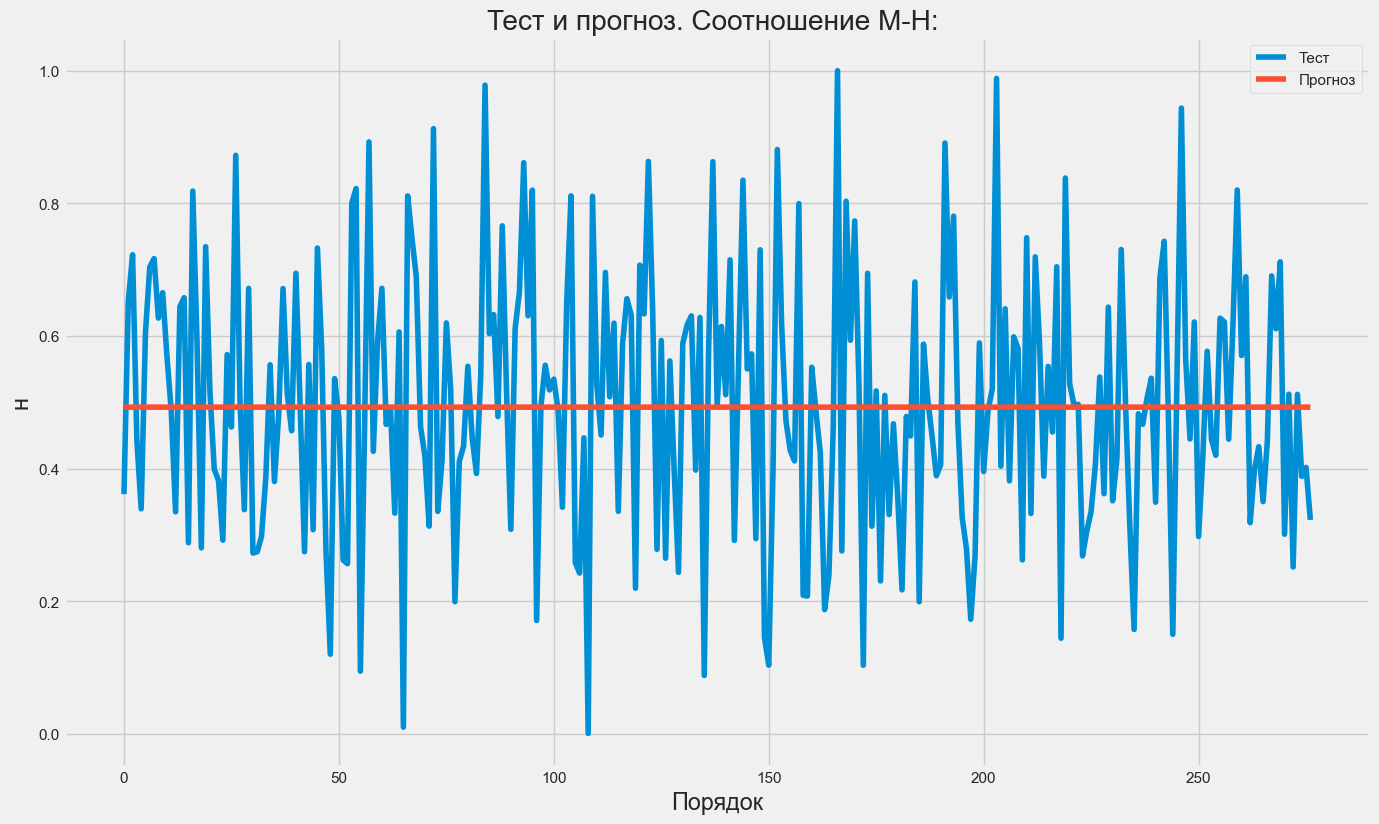

In [68]:
predicted_ns3(y_test_ns3, model_ns3.predict(X_test_ns3))

Вывод: модель многослойной нейросети для показателя "Соотношение матрица-наполнитель" построена и обучена на данных выборки. Средняя абсолютная ошибка сотавиа 0,1484. 

# 5. Приложение прогноза показателя "Прочность при растяжении, МПа"

Для сохранения выбираем последнюю модель, прогнозирующую показатель "Прочность при растяжении, МПа".

In [69]:
from joblib import dump, load
dump(model, 'filename.joblib')

['filename.joblib']

In [70]:
model_l = load('filename.joblib') 

In [71]:
model_l

KNeighborsRegressor(n_neighbors=50)

In [72]:
model_l = load('filename.joblib') 

def input_proc():
    print('вызов модели')

    res = model_l.predict(X_test)
    print(res)

print('выберите 1,2,3')

for i in range(110):
    choice = input()
    check = choice
    if check == '1':
        print('Введите данные')
        input_proc()
    elif check == '2':
        print('Случайные данные')
    elif check == '3':
        break

выберите 1,2,3
1
Введите данные
вызов модели
[0.52946475 0.51460214 0.51822824 0.53112469 0.49886644 0.5173558
 0.51539408 0.54326427 0.57618121 0.50143592 0.52957237 0.5198267
 0.51521506 0.51080278 0.49848527 0.52282978 0.51630903 0.48739954
 0.51332626 0.53290467 0.5169375  0.55016697 0.54462132 0.45398439
 0.5206802  0.5603364  0.51444394 0.48672334 0.49304108 0.49657912
 0.52461513 0.51287672 0.51792173 0.5065349  0.527126   0.52255286
 0.5412263  0.50634568 0.51271218 0.52595151 0.52873011 0.51998027
 0.48775975 0.54334782 0.52203955 0.49179531 0.48899343 0.52499419
 0.52672468 0.50663145 0.50136313 0.50800963 0.54122436 0.48276096
 0.54285313 0.51553984 0.51539813 0.51274409 0.52366432 0.50315565
 0.52540802 0.54097201 0.50962076 0.54774373 0.54136012 0.50469734
 0.52269247 0.51530237 0.4787523  0.53424602 0.52372434 0.52696479
 0.48120754 0.51571996 0.54852608 0.49559452 0.52212988 0.49054019
 0.51391362 0.51559107 0.54665531 0.52826182 0.48977927 0.49476689
 0.51354523 0.50336